*Many thanks to everyone who contributed to, commented on, and upvoted this kernel! This challenge is my first "real" project on kaggle and I sincerely appreciate the inspiring, constructive, and friendly atmosphere here. I've already learned a lot and I wish to thank you for your support and encouragement!.*

(Latest update to reflect changes in new *dplyr* release.)

In an extension of this work I have started a [new kernel](https://www.kaggle.com/headsortails/mercedas-2-feature-interactions) focused on the exploratory potential of *feature interactions*. I hope you will find that one useful too.

# Introduction

This is an Exploratory Data Analysis for the [Mercedes-Benz Greener Manufacturing](https://www.kaggle.com/c/mercedes-benz-greener-manufacturing) challenge. I will be using *ggplot2*, *tidyverse* tools, and some individual useful functions to examine the data in detail.


The data features are anonymised and we only know that *each represents a custom car feature*. The target variable *y* is the time in seconds that the car needs to pass the test. This is the variable that we are challenged to predict. The motivation is for "greener manufacturing" by tailoring the testing process to the car feature set and thereby reducing CO2 emissions, but I suspect that a little side effect will be for the company to save a bit of money.

Other than that, the [data introduction](https://www.kaggle.com/c/mercedes-benz-greener-manufacturing/data) only notes that "variables with letters are categorical [and] variables with 0/1 are binary values."


## Load libraries and data files


In [9]:
library('ggplot2') # visualization
library('ggthemes') # visualization
library('scales') # visualization
library('grid') # visualisation
library('gridExtra') # visualisation
library('corrplot') # visualisation
library('ggfortify') # visualisation
library('dplyr') # data manipulation
library('readr') # data input
library('tibble') # data wrangling
library('stringr') # string manipulation
library('forcats') # factor manipulation
library('mclust') # clustering

In [11]:
train <- read_csv('input/train.csv')
test  <- read_csv('input/test.csv')
combine  <- full_join(train, test)

Parsed with column specification:
cols(
  .default = col_integer(),
  y = col_double(),
  X0 = col_character(),
  X1 = col_character(),
  X2 = col_character(),
  X3 = col_character(),
  X4 = col_character(),
  X5 = col_character(),
  X6 = col_character(),
  X8 = col_character()
)
See spec(...) for full column specifications.
Parsed with column specification:
cols(
  .default = col_integer(),
  X0 = col_character(),
  X1 = col_character(),
  X2 = col_character(),
  X3 = col_character(),
  X4 = col_character(),
  X5 = col_character(),
  X6 = col_character(),
  X8 = col_character()
)
See spec(...) for full column specifications.
Joining, by = c("ID", "X0", "X1", "X2", "X3", "X4", "X5", "X6", "X8", "X10", "X11", "X12", "X13", "X14", "X15", "X16", "X17", "X18", "X19", "X20", "X21", "X22", "X23", "X24", "X26", "X27", "X28", "X29", "X30", "X31", "X32", "X33", "X34", "X35", "X36", "X37", "X38", "X39", "X40", "X41", "X42", "X43", "X44", "X45", "X46", "X47", "X48", "X49", "X50", "X51", "X52", "X

In [14]:
train %>%
  select(y,X0:X12) %>%
  glimpse()
ncol(train)

Observations: 4,209
Variables: 12
$ y   <dbl> 130.81, 88.53, 76.26, 80.62, 78.02, 92.93, 128.76, 91.91, 108.6...
$ X0  <chr> "k", "k", "az", "az", "az", "t", "al", "o", "w", "j", "h", "al"...
$ X1  <chr> "v", "t", "w", "t", "v", "b", "r", "l", "s", "b", "r", "r", "b"...
$ X2  <chr> "at", "av", "n", "n", "n", "e", "e", "as", "as", "aq", "r", "e"...
$ X3  <chr> "a", "e", "c", "f", "f", "c", "f", "f", "e", "c", "f", "f", "c"...
$ X4  <chr> "d", "d", "d", "d", "d", "d", "d", "d", "d", "d", "d", "d", "d"...
$ X5  <chr> "u", "y", "x", "x", "h", "g", "f", "f", "f", "f", "f", "f", "f"...
$ X6  <chr> "j", "l", "j", "l", "d", "h", "h", "j", "i", "a", "h", "h", "g"...
$ X8  <chr> "o", "o", "x", "e", "n", "s", "s", "a", "h", "e", "p", "o", "m"...
$ X10 <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
$ X11 <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
$ X12 <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...


[1] 378

The data set is not particularly large in times of overall size, but it's notably wide with 378 columns. The vast majority of features seem to follow a binary encoding, but the first 8 (*X0 - X8*; there's no *X7*) are string features:

In [15]:
for (i in seq(3,10)){
  print(str_c("Feature", colnames(combine)[i], "has these unique values:", sep=" "))
  print(str_sort(unique(combine[[i]])))
}

[1] "Feature X0 has these unique values:"
 [1] "a"  "aa" "ab" "ac" "ad" "ae" "af" "ag" "ai" "aj" "ak" "al" "am" "an" "ao"
[16] "ap" "aq" "as" "at" "au" "av" "aw" "ax" "ay" "az" "b"  "ba" "bb" "bc" "c" 
[31] "d"  "e"  "f"  "g"  "h"  "i"  "j"  "k"  "l"  "m"  "n"  "o"  "p"  "q"  "r" 
[46] "s"  "t"  "u"  "v"  "w"  "x"  "y"  "z" 
[1] "Feature X1 has these unique values:"
 [1] "a"  "aa" "ab" "b"  "c"  "d"  "e"  "f"  "g"  "h"  "i"  "j"  "k"  "l"  "m" 
[16] "n"  "o"  "p"  "q"  "r"  "s"  "t"  "u"  "v"  "w"  "y"  "z" 
[1] "Feature X2 has these unique values:"
 [1] "a"  "aa" "ab" "ac" "ad" "ae" "af" "ag" "ah" "ai" "aj" "ak" "al" "am" "an"
[16] "ao" "ap" "aq" "ar" "as" "at" "au" "av" "aw" "ax" "ay" "b"  "c"  "d"  "e" 
[31] "f"  "g"  "h"  "i"  "j"  "k"  "l"  "m"  "n"  "o"  "p"  "q"  "r"  "s"  "t" 
[46] "u"  "w"  "x"  "y"  "z" 
[1] "Feature X3 has these unique values:"
[1] "a" "b" "c" "d" "e" "f" "g"
[1] "Feature X4 has these unique values:"
[1] "a" "b" "c" "d"
[1] "Feature X5 has these unique value

We find that some of the string features have fewer levels than others (e.g. *X4* had 4 but *X8* has 26). Also, all values follow a similar pattern of encoding by one or two letters. We don't know what these letter codes represent, but since we are dealing with car customisation it seems resonable to assume that they encode multiple-choice features for your car specifications. An obvious example would be the colour of the car, which shouldn't have an impact on the testing performance and could therefore correspond to the missing *X7* or *X9*.

*(As an aside: I can imagine that one could make an educated guess about the real identity of these multi-level features from the number of the levels and their "popularity" in our data, if one were inclined to do so.)*

To make things a bit simpler there are no missing values:

In [16]:
sum(is.na(train))

[1] 0

Given the situation, I decide to recode the categorical features as factors. I also create a separate training data frame in which *all X-something* features are factors.

In [17]:
train <- train %>%
  mutate_at(vars(X0:X8), funs(factor))
test <- test %>%
  mutate_at(vars(X0:X8), funs(factor))
combine <- combine %>%
  mutate_at(vars(X0:X8), funs(factor))

train_f <- train %>%
  mutate_at(vars(starts_with("X")), funs(factor))
test_f <- test %>%
  mutate_at(vars(starts_with("X")), funs(factor))
combine_f <- combine %>%
  mutate_at(vars(starts_with("X")), funs(factor))

# Visualisation with ggplot2

## Overview plots

We start with some global overview plots to get a better idea of the data and find entry points for a more detailed analysis.

First, let's look at the distribution of the factor levels:

 [1] 53 27 50  7  4 33 12 25  2  2


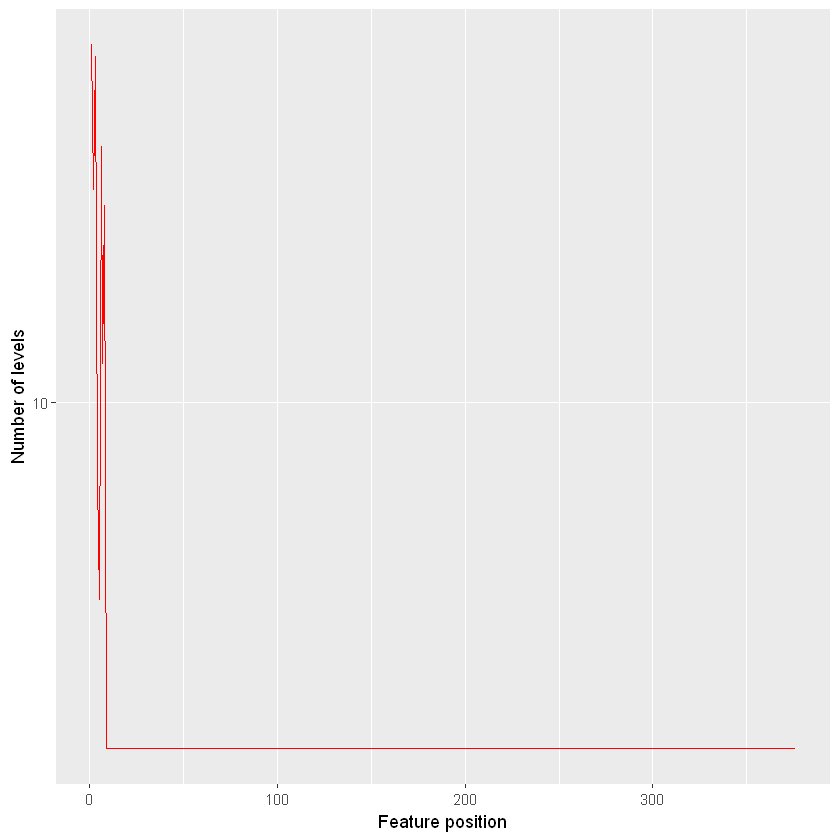

In [20]:
lsize <- length(combine)-2
levels <- tibble(
  nr = seq(1,lsize),
  name = "test",
  counts = rep(0,lsize)
)
for (i in seq(3,length(train))){
  levels$name[i-2] <- colnames(combine_f)[i]
  levels$counts[i-2] <- fct_unique(combine_f[[i]]) %>% length()
}

levels %>%
  ggplot(aes(nr,counts)) +
  geom_line(colour="red") +
  labs(x = 'Feature position') +
  labs(y = 'Number of levels') +
  scale_y_log10()

print(levels$counts[seq(1,10)])

We see that beyond the first few text features everything else is binary. This is consistent with the information that we got on the data introduction page. Always better to check.

In [21]:
lsize <- length(train)-2
levels <- tibble(
  nr = seq(1,lsize),
  name = "test",
  counts = rep(0,lsize)
)

for (i in seq(3,length(train_f))){
  levels$name[i-2] <- colnames(train_f)[i]
  levels$counts[i-2] <- fct_unique(train_f[[i]]) %>% length()
}

levels %>%
  filter(counts < 2) %>%
  count()

n
12


However, for the training set there are actually 12 features without any variation. We won't be able to train our classifiers on these features, so we might as well discard them.

In [24]:
zero_var_col <- levels %>% 
  filter(levels$counts < 2) %>% 
  select(name)
print(zero_var_col)

good_var_col <- levels %>% 
  filter(levels$counts > 1) %>% 
  select(name)

train <- train %>%
  select_(.dots = c("ID", "y", good_var_col$name))
test <- test %>%
  select_(.dots = c("ID", good_var_col$name))

# A tibble: 12 x 1
   name 
   <chr>
 1 X11  
 2 X93  
 3 X107 
 4 X233 
 5 X235 
 6 X268 
 7 X289 
 8 X290 
 9 X293 
10 X297 
11 X330 
12 X347 


There are too many features for a normal-sized correlation matrix, so let's start with an overview image heatmap to see whether there are any large-scale trends:

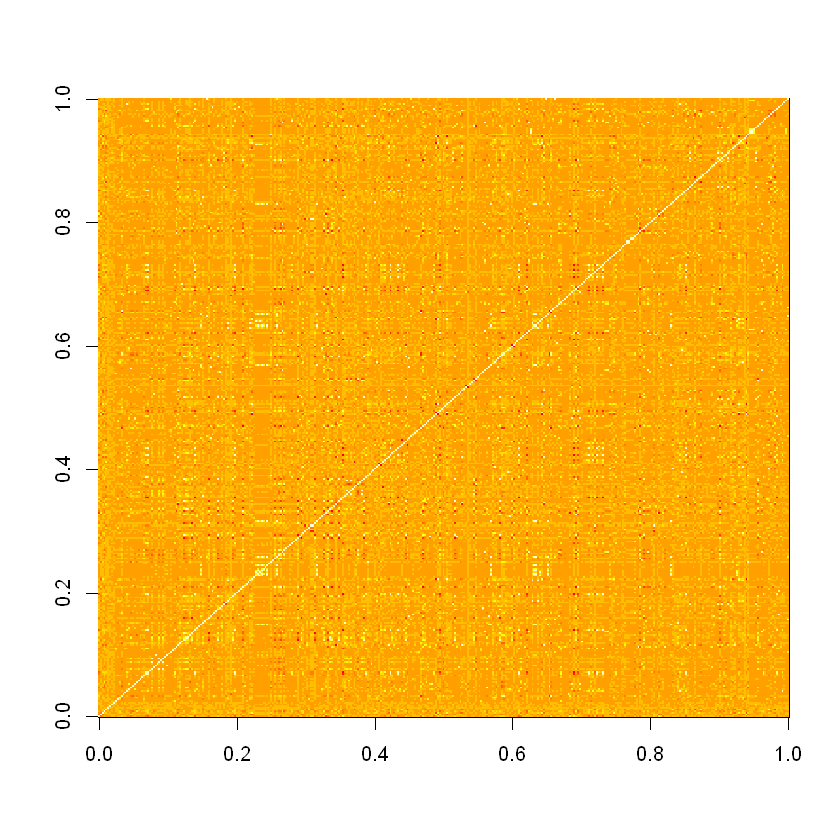

In [25]:
train %>%
  mutate_at(vars(starts_with("X")), funs(as.integer)) %>%
  arrange(y) %>%
  select(-ID) %>%
  cor(use="complete.obs") %>%
#  image(xlim=c(0.6,0.65),ylim=c(0.6,0.65))
  image()

There are a couple of darker values and a few rows and a few columns that are white, suggesting that the corresponding features are identical. *TODO:* Let's check them later.

For now, we will look at the text factors in particular:

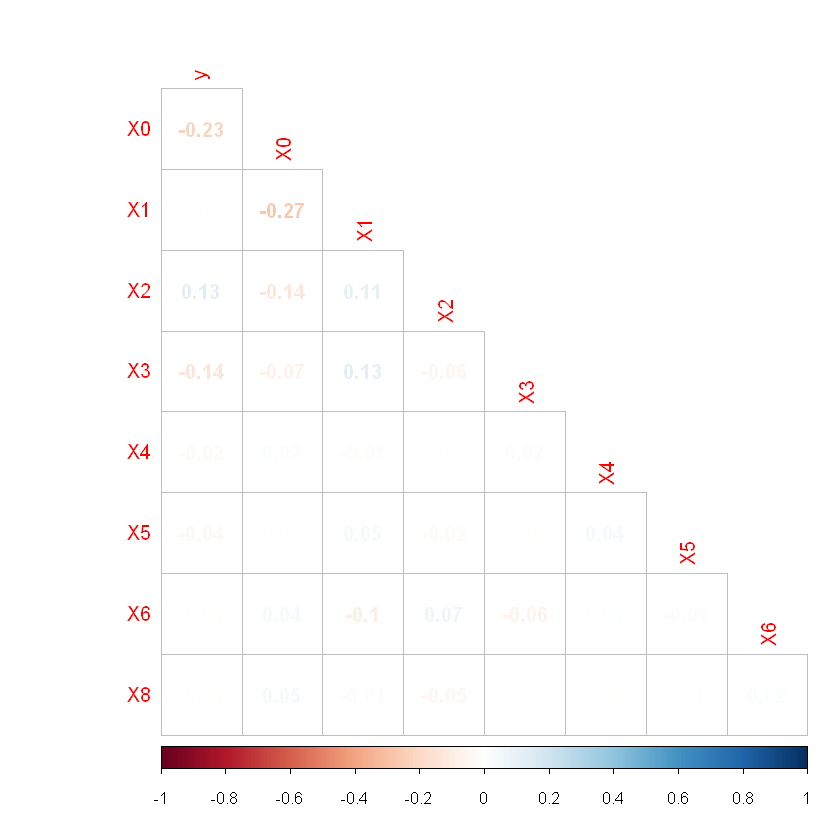

In [30]:
train %>%
  select(y,X0:X8) %>%
  mutate_at(vars(starts_with("X")), funs(as.integer)) %>%
  cor(use="complete.obs", method="spearman") %>%
  corrplot(type="lower", method="number", diag=FALSE)

There is a bit of correlation between the first few features, but nothing stands out and the rest of the features have almost no relation. (With the fading applied, everything you'd need to squint to see isn't worth seeing.)

## Individual features

### Testing times: *y*

Let's start with studying the distribution of our target variable *y*: the time it takes the car to complete the testing procedures:

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  72.11   90.82   99.15  100.67  109.01  265.32 


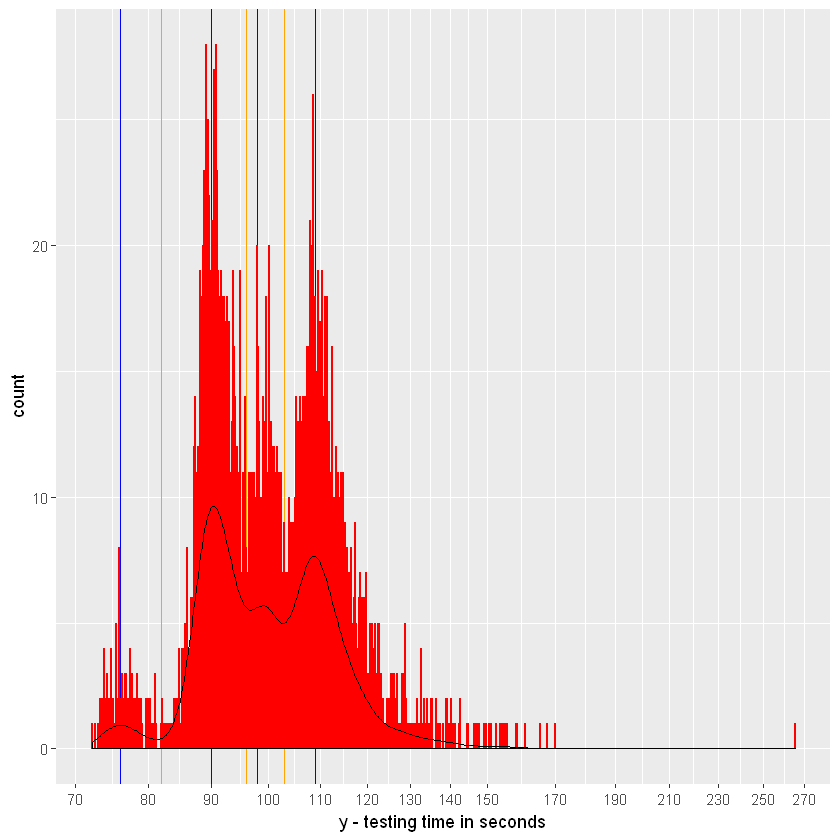

In [31]:
train %>%
  ggplot(aes(y)) +
  geom_vline(xintercept = c(76,90,98,109), colour="blue") +
  geom_vline(xintercept = c(82,96,103), colour="orange") +
  geom_histogram(colour="red", bins = length(train$y)/3) +
  geom_density() +
  scale_x_log10(breaks=c(seq(70,150,10),seq(170,270,20))) +
  labs(x = "y - testing time in seconds")

print(summary(train$y))

I chose a logarithmic x-axis to better separate the multiple peaks and still include the larger time-scales in the same plot.

We find the following:

- There are at least 4 peaks, eyeballed to be grouped around 75, 90, 100, and 110 seconds (blue vertical lines). It's reasonable to assume that they represent groups of similar testing complexity. The minima between the groups are roughly estimated as the orange lines (82, 96, 103 s).

- The peaks themselves might show some sub-structure (especially the 2nd one) but this could simply be noise.

- The last peak has a notable tail towards longer times, with individual values as far out as 170 s.

- There is one data point at around 265 s, far away from the rest of the distribution:

In [32]:
train %>%
  filter(y > 250)

ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
1770,265.32,y,r,ai,f,d,ag,l,t,...,0,0,0,0,0,0,0,0,0,0


I can see no obvious indication for why this data point should be so unusual (e.g. all the binary flags switched to "on"). This might be an input error (or an effect of the human factor in the measuring process) and I will ignore it for the time being

In [33]:
train <- train %>%
  filter(y < 250)

### Categorical features: *X1 - X8*

Next up, let's plot the distributions of *y* within the levels of the multi-level string features.

*Based on a suggestion by [Dieter Nagel](https://www.kaggle.com/dieternagel) in the comments, we add information on the number of individual data points to this visualisation. I chose a slightly different approach than suggested in the comment and decided to use boxplots overlayed by jitter plots to show the number and distribution of the individual data points. In particular, this indicates the factor levels with few entries to avoid drawing conclusions on sparse data.*

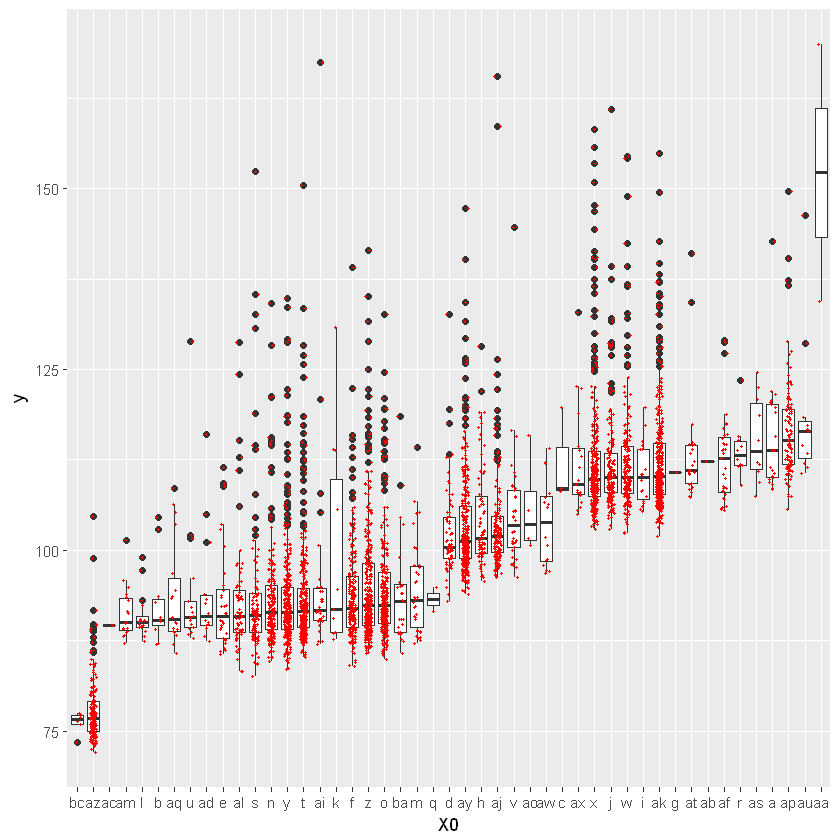

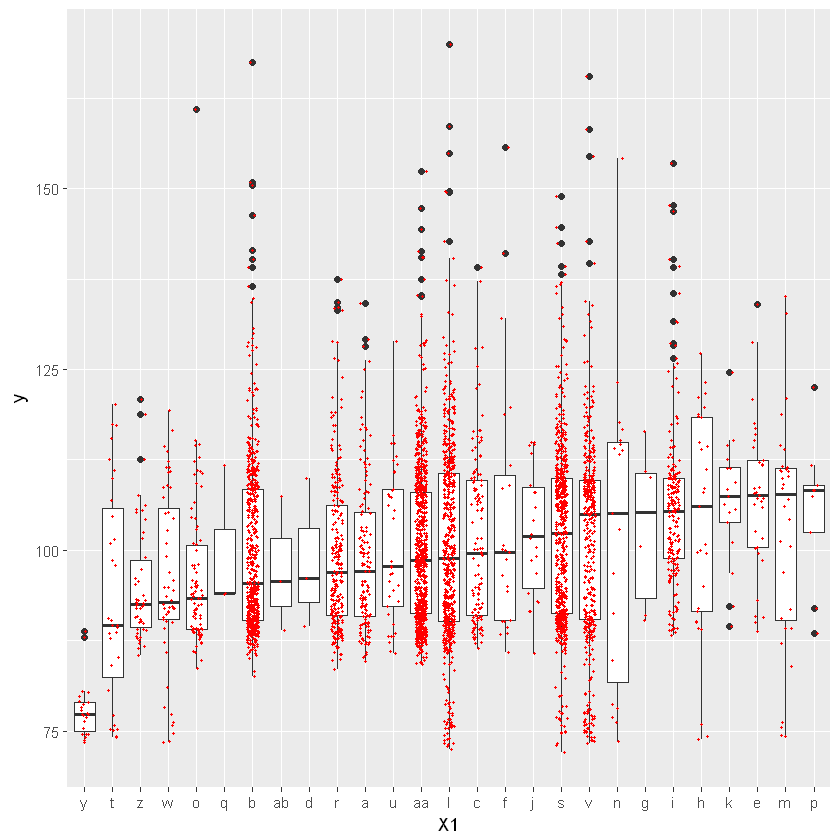

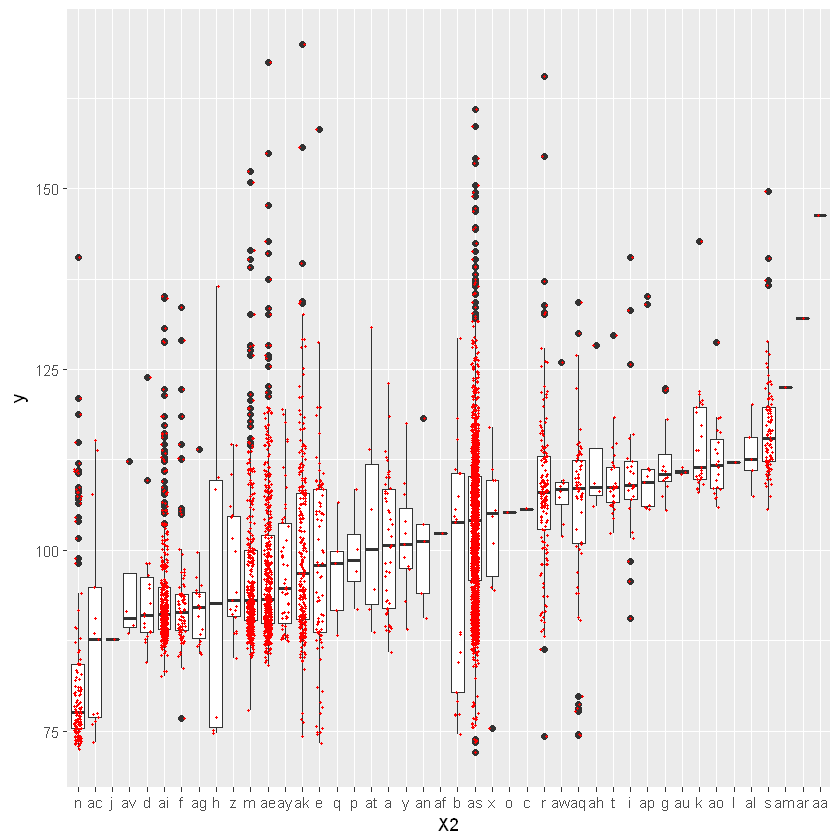

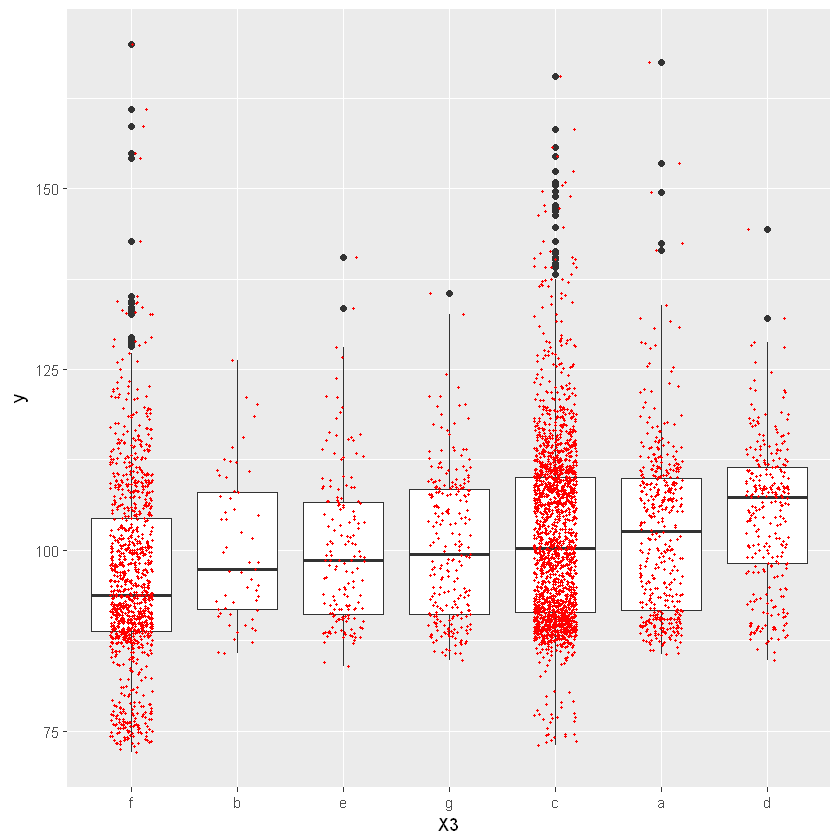

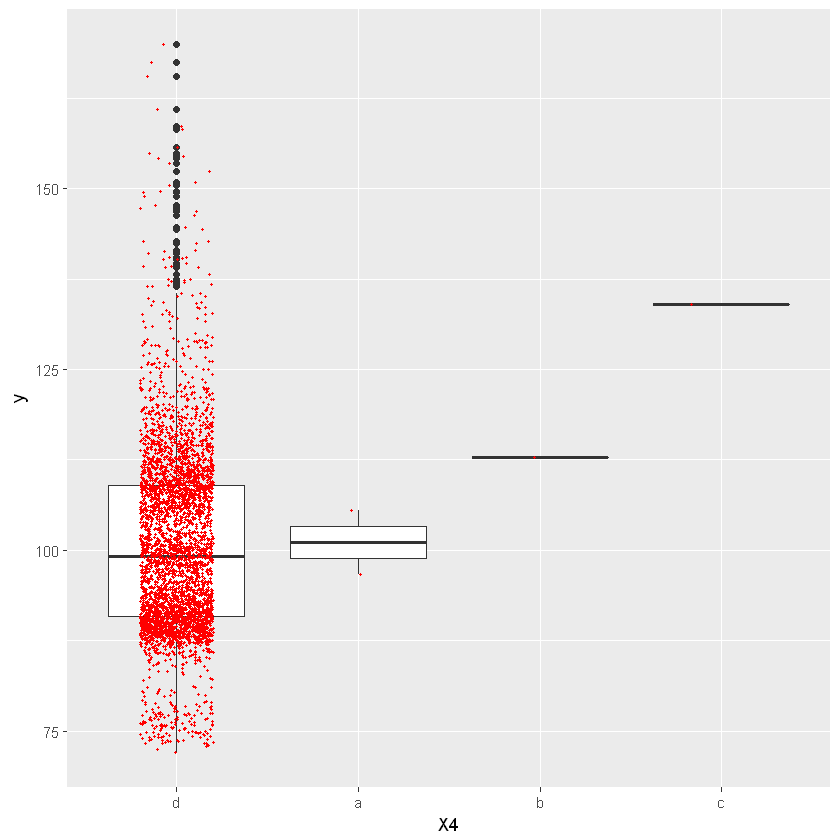

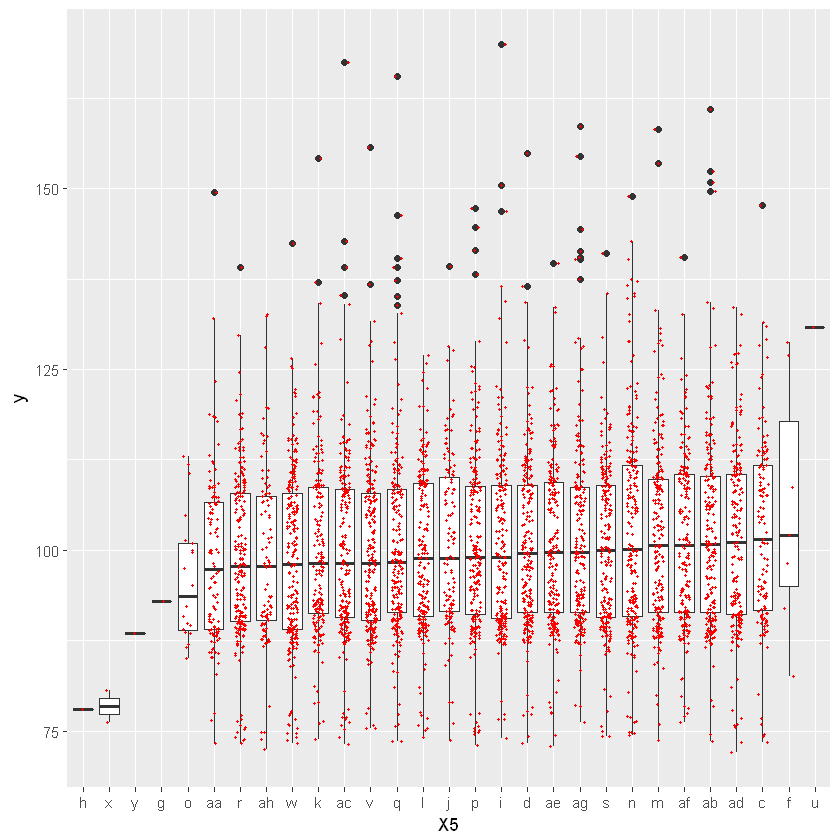

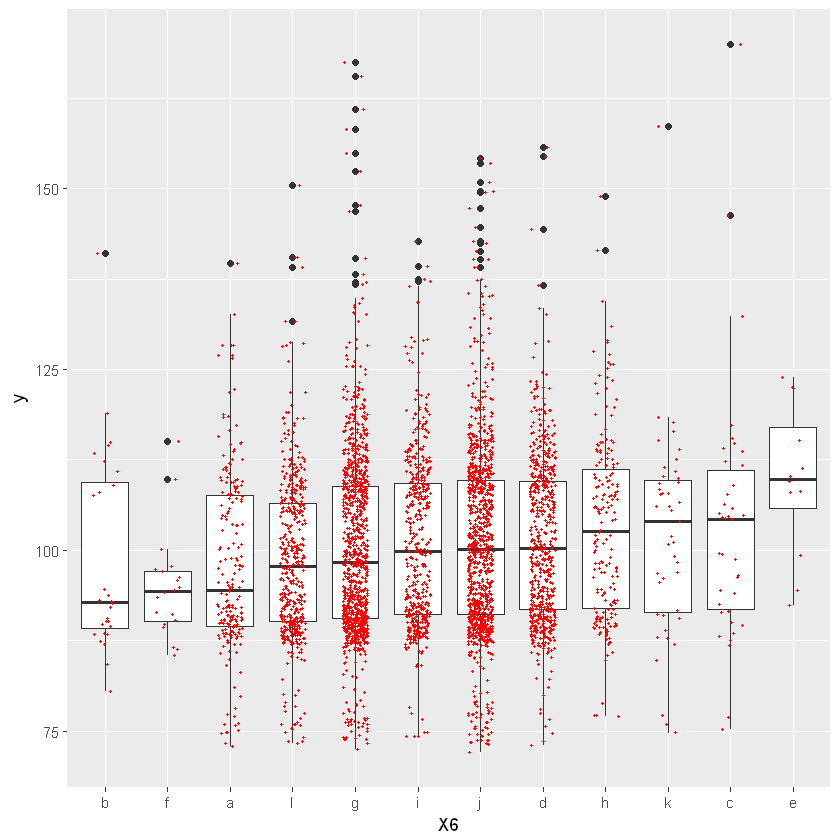

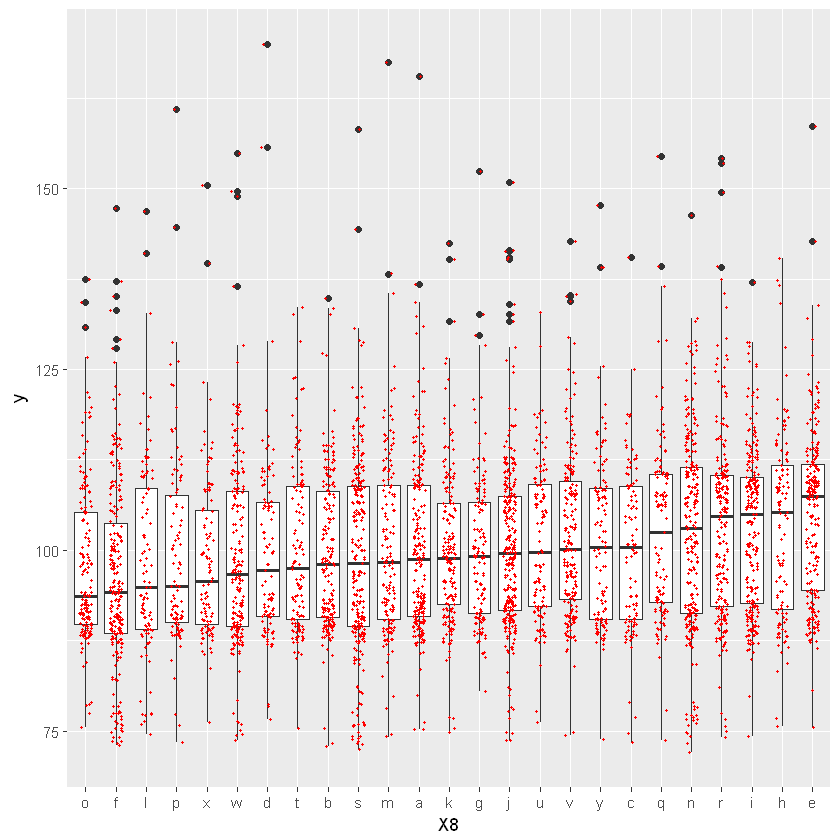

In [34]:
#for (i in colnames(train)[3:10]){
#  ggplot(train, aes_string(x = i, y = "y")) + geom_boxplot()
#}

ggplot(train, aes(reorder(X0, y, FUN = median) , y)) + geom_boxplot() + labs(x = "X0") +
  geom_jitter(color="red", width = 0.2, size = 0.4)
ggplot(train, aes(reorder(X1, y, FUN = median) , y)) + geom_boxplot() + labs(x = "X1") +
  geom_jitter(color="red", width = 0.2, size = 0.4)
ggplot(train, aes(reorder(X2, y, FUN = median) , y)) + geom_boxplot() + labs(x = "X2") +
  geom_jitter(color="red", width = 0.2, size = 0.4)
ggplot(train, aes(reorder(X3, y, FUN = median) , y)) + geom_boxplot() + labs(x = "X3") +
  geom_jitter(color="red", width = 0.2, size = 0.4)
ggplot(train, aes(reorder(X4, y, FUN = median) , y)) + geom_boxplot() + labs(x = "X4") +
  geom_jitter(color="red", width = 0.2, size = 0.4)
ggplot(train, aes(reorder(X5, y, FUN = median) , y)) + geom_boxplot() + labs(x = "X5") +
  geom_jitter(color="red", width = 0.2, size = 0.4)
ggplot(train, aes(reorder(X6, y, FUN = median) , y)) + geom_boxplot() + labs(x = "X6") +
  geom_jitter(color="red", width = 0.2, size = 0.4)
ggplot(train, aes(reorder(X8, y, FUN = median) , y)) + geom_boxplot() + labs(x = "X8") +
  geom_jitter(color="red", width = 0.2, size = 0.4)

In these boxplots we find the following:

- *X0* and *X2* have a large amount of diversity in their levels. Among those two, *X0* shows the most obvious effect of grouping; possibly accounting for a lot of the multi-modal structure in *y* that we found in the histogram above.

- The lowest *y* values (i.e. shortest times) appear to be predominantly caused by 6 feature levels: *X0:b, X0:ca, X1:y, X2:n, X5:h, X5:x*. Together, these ones are a pretty good predictor for having low *y*.

- Level *X0:aa* appears to have a notably higher average *y* than all other features, but consists only of two data points. This is very obvious with the jitter plot overlay.

- *X3, X5, X6, X8* and to a certain extent *X1* show distributions that are largely similar among the different levels

- *X4* has almost all values in one factor level:

In [36]:
train %>%
  select(X4) %>% 
  group_by(X4) %>%
  summarise(count = n())

X4,count
a,2
b,1
c,1
d,4204


## Feature relations

### Categorical features vs *y*

So, *X0* and *X2* are the interesting multi-level features (at least on first approximation). How are their combinations distributed?

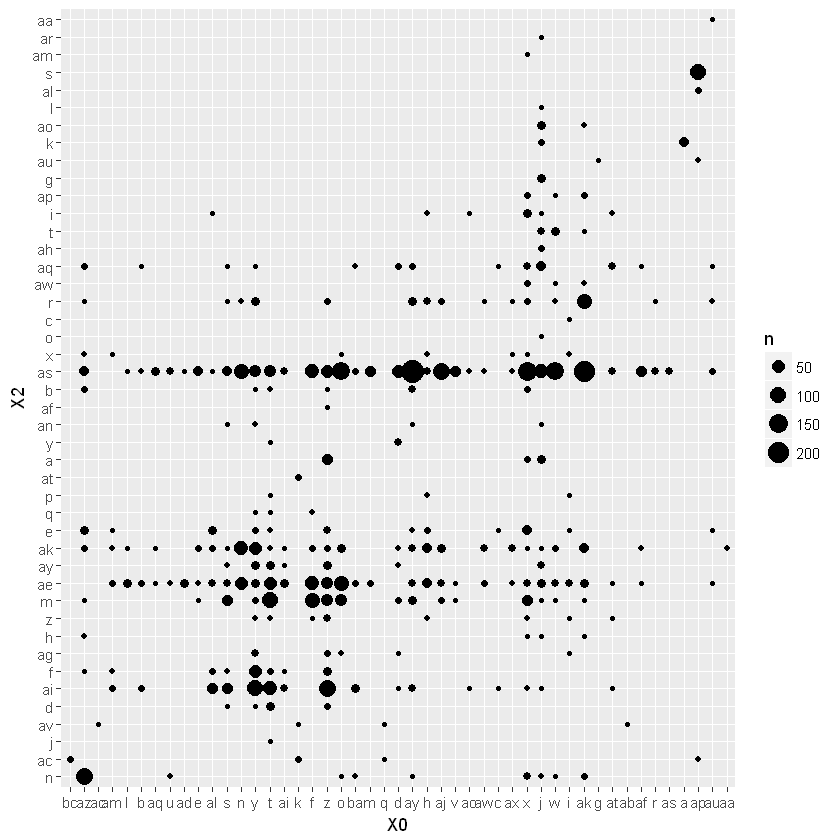

In [37]:
train %>%
  select(y, X0, X2) %>%
  ggplot(aes(reorder(X0, y, FUN = median), reorder(X2, y, FUN = median))) +
  #ggplot() +
  geom_count() +
#  scale_size_area() +
  labs(x = "X0", y = "X2")

Again, both axes are re-ordered so that the median *y* is increasing. The size of the dots scales with the number of occurences of the corresponding combinations. Therefore, this plot shows the more popular combinations as larger dots and it tells us the following:

- only about a dozen combinations make up a large part of our data

- to get the highest *y* values (i.e. longest testing times) from *X2* you need the highest *y*-value levels from *X0* (see the upper right corner and compare how the upper left corner and middle are empty).

### Binary features (*X10+*) vs *y*

For the binary features, let's see if there's a trend as to (a) how many are set in each row and (b) how this number relates to the testing time *y*:


`geom_smooth()` using method = 'gam'


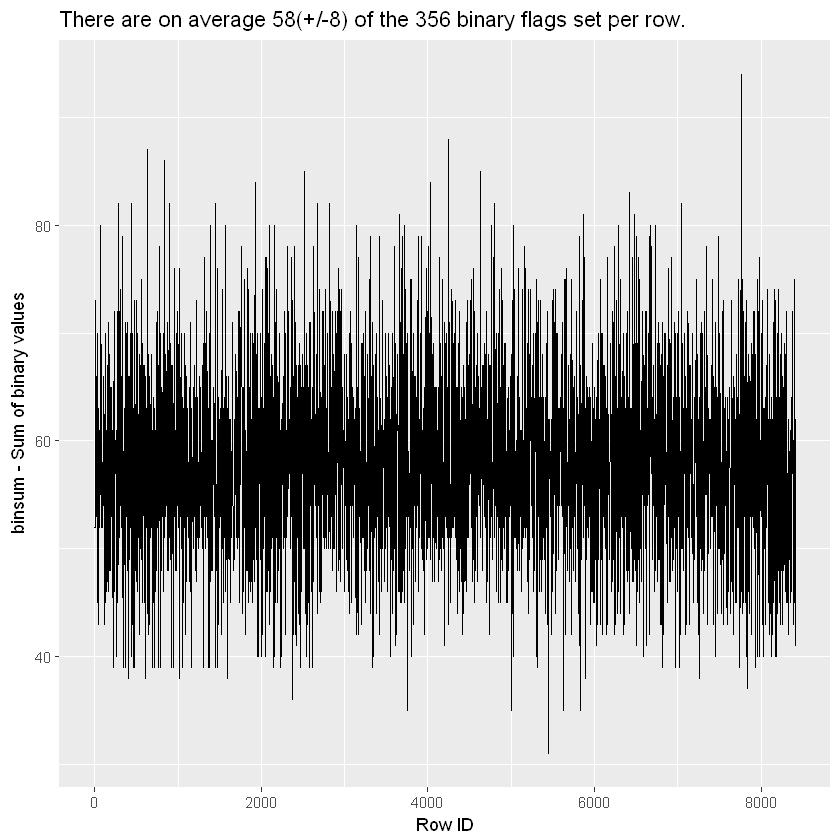

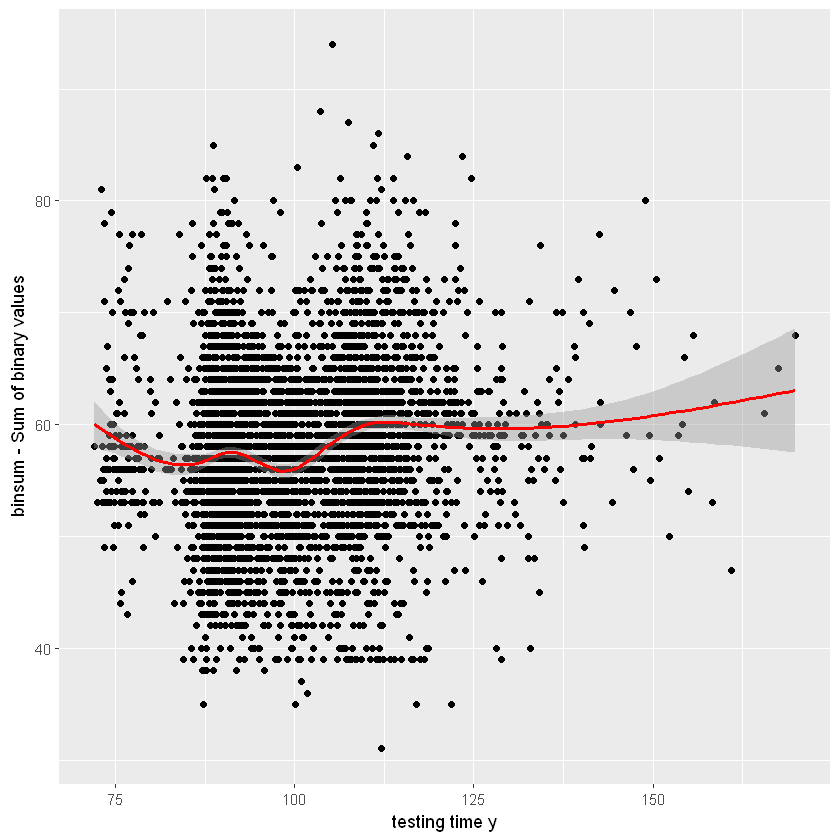

In [38]:
dummy <- train %>%
  select(ID,y,X10:X385)
foo <- tibble(ID = dummy$ID, binsum = rowSums(dummy[-1:-2]), y = dummy$y)
fighead <- str_c("There are on average ", 
                 sprintf("%.0f",mean(foo$binsum)),
                 "(+/-",
                 sprintf("%.0f",sd(foo$binsum)),
                 ") of the ",
                 sprintf("%.0f",length(colnames(dummy))-2),
                 " binary flags set per row.")

ggplot(foo) +
  geom_line(aes(ID,binsum)) +
  labs(x = "Row ID", y = "binsum - Sum of binary values") +
  ggtitle(fighead)

ggplot(foo) +
  geom_point(aes(y, binsum)) +
  geom_smooth(aes(y, binsum), colour="red") +
  labs(x = "testing time y", y = "binsum - Sum of binary values")

From these two plots we see that:

- There's on average only about 60 out of 350 flags set in each row. That number rarely rises above 80 and never above 100.

- There is a bit of a substructure in the *y* vs *binsum* plot. No strong trend that would suggest that setting more flags results in much larger testing times; which is interesting. However, the two largest clusters of data, around *y = 90* and *y = 110* (corresponding to groups 2 and 4 in the *y* histogram above) might have *binsum* distributions that are slightly shifted with respect to each other. Let's have a closer look:

[1] 57 59


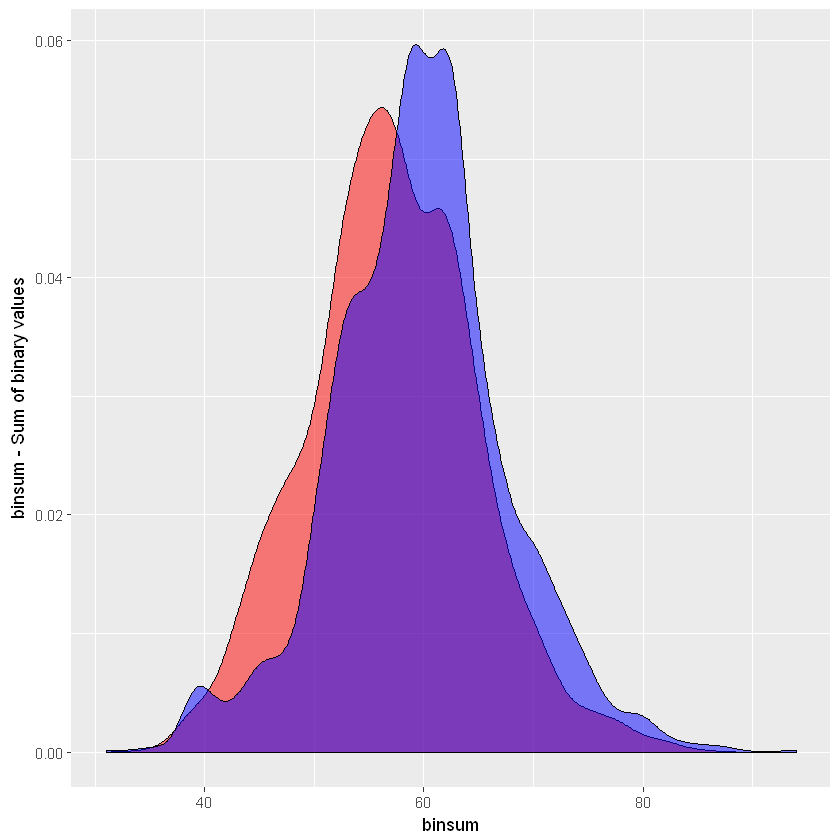

In [45]:
dummy <- train %>%
  select(ID,y,X10:X385)
foo <- tibble(ID = dummy$ID, binsum = rowSums(dummy[-1:-2]), y = dummy$y)
ggplot(foo, aes(binsum)) +
  geom_density(data = subset(foo, (y > 82 & y < 96)), fill = "red", alpha = 0.5) +
  geom_density(data = subset(foo, (y > 103)), fill = "blue", alpha = 0.5) +
  labs(y = "binsum - Sum of binary values")

print(c(median(foo$binsum[foo$y > 82 & foo$y < 96]), median(foo$binsum[foo$y>103])))

There seems to be a shift in center although it only amounts to about 2 binary flags set or not set.

### Binary features (*X10+*) vs *y* and categorical features *X1 - X8*

To take the *binsum* feature a bit further, we can examine how it changes for the different levels of the *categorical features X1 - X8*. The following plots are the same as Fig. 5a-h, only for the *binsum* statistics for the different *X1 - X8* levels. We are still summing up the entire observation (= row) but now we only look at the statistics of those rows that include the given *X1 - X8* levels. I have added the overall mean *binsum* value (58) as a horizontal blue line to each of the following plots. We're using the same boxplot + jitterplot combination as above.

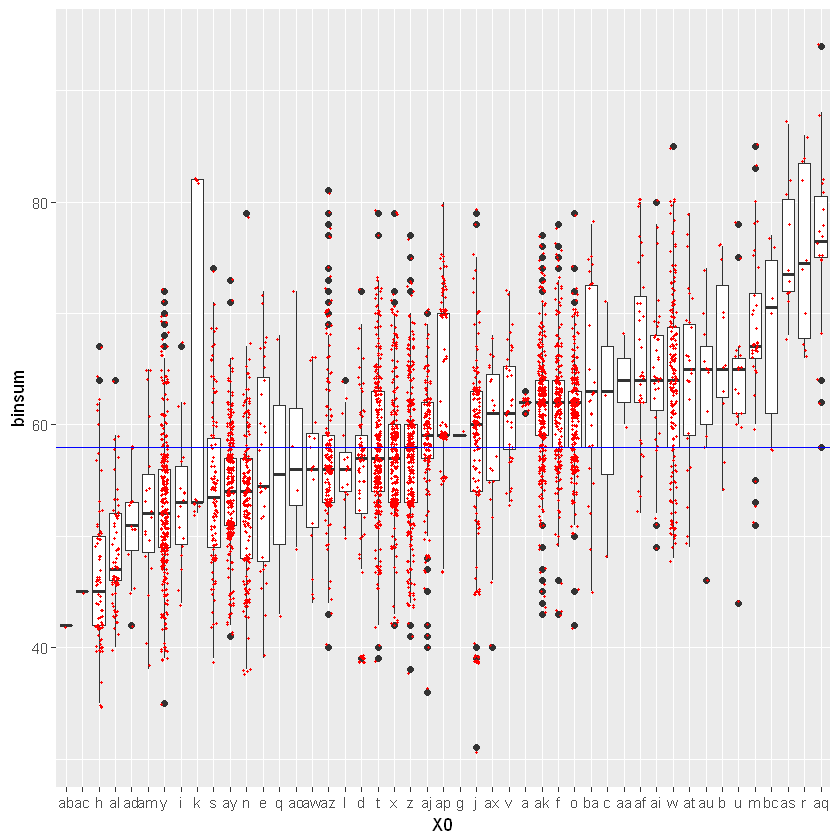

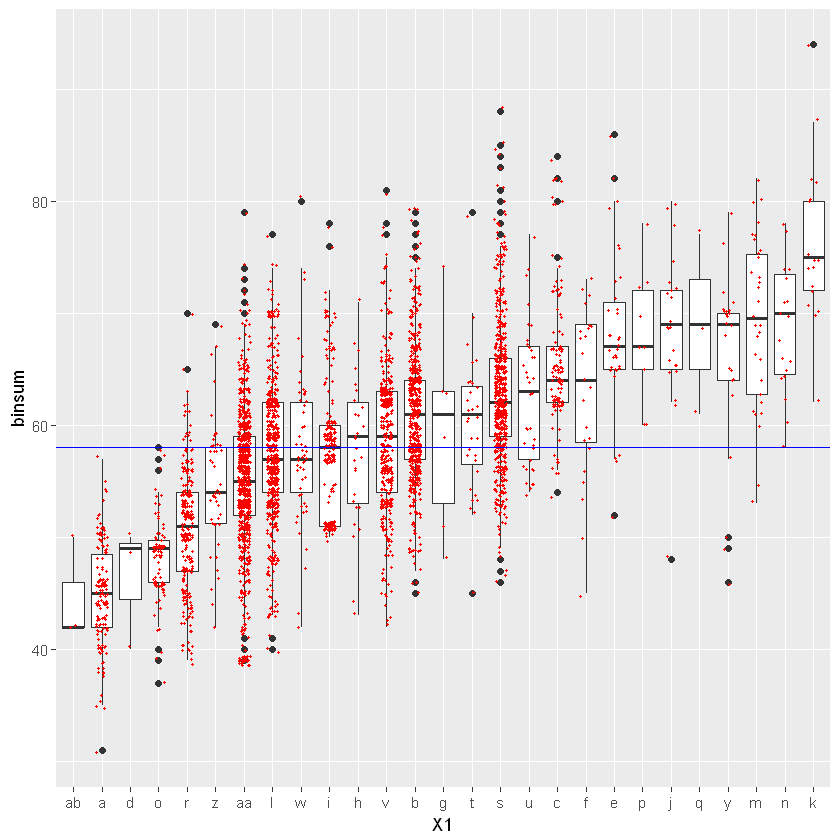

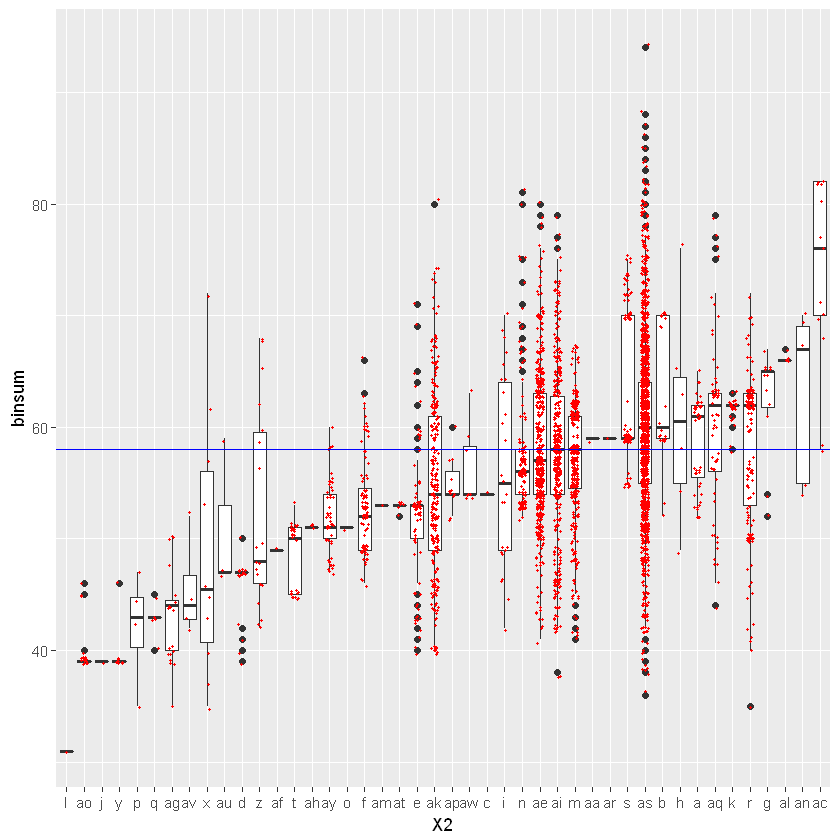

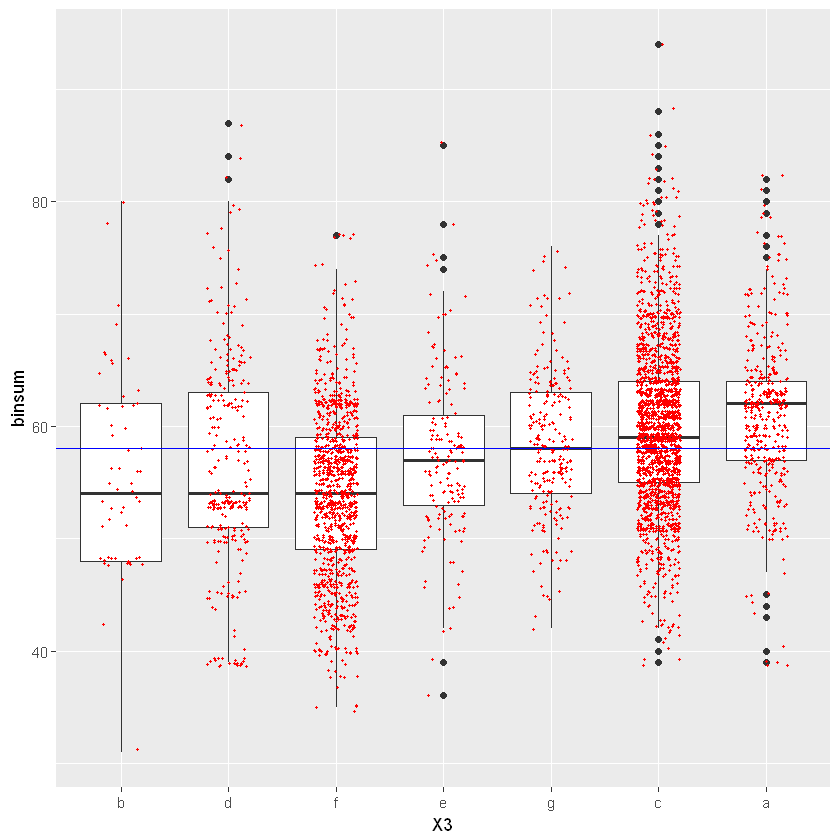

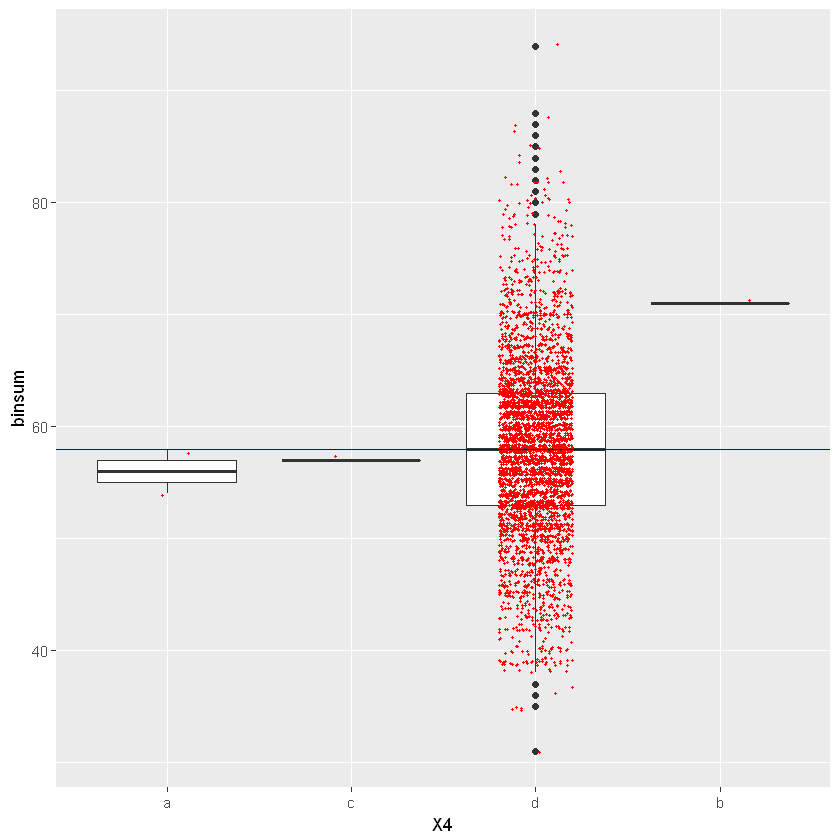

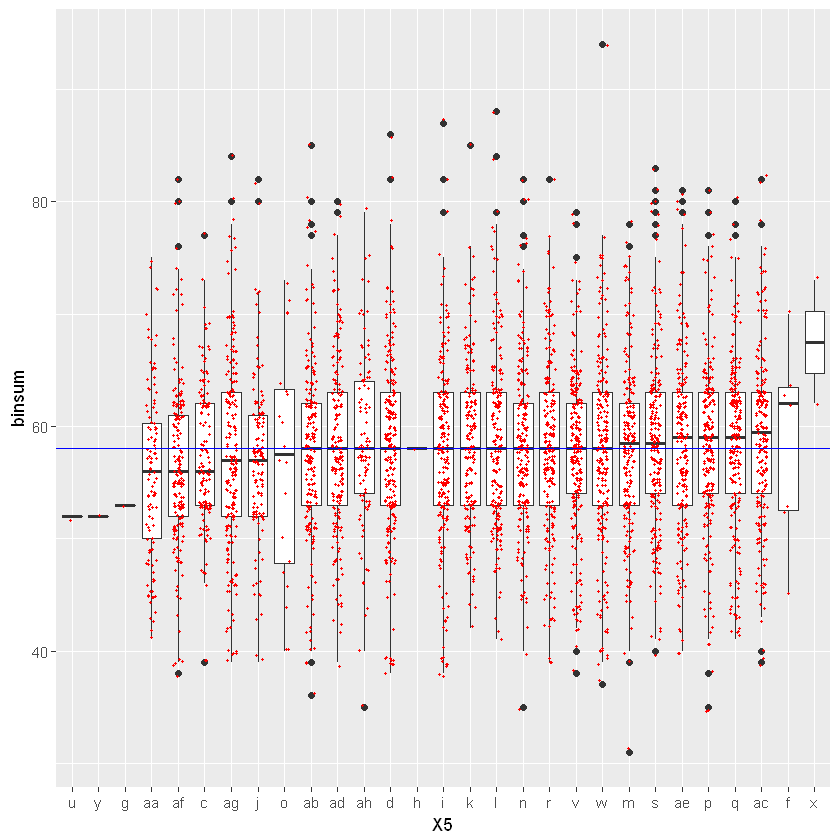

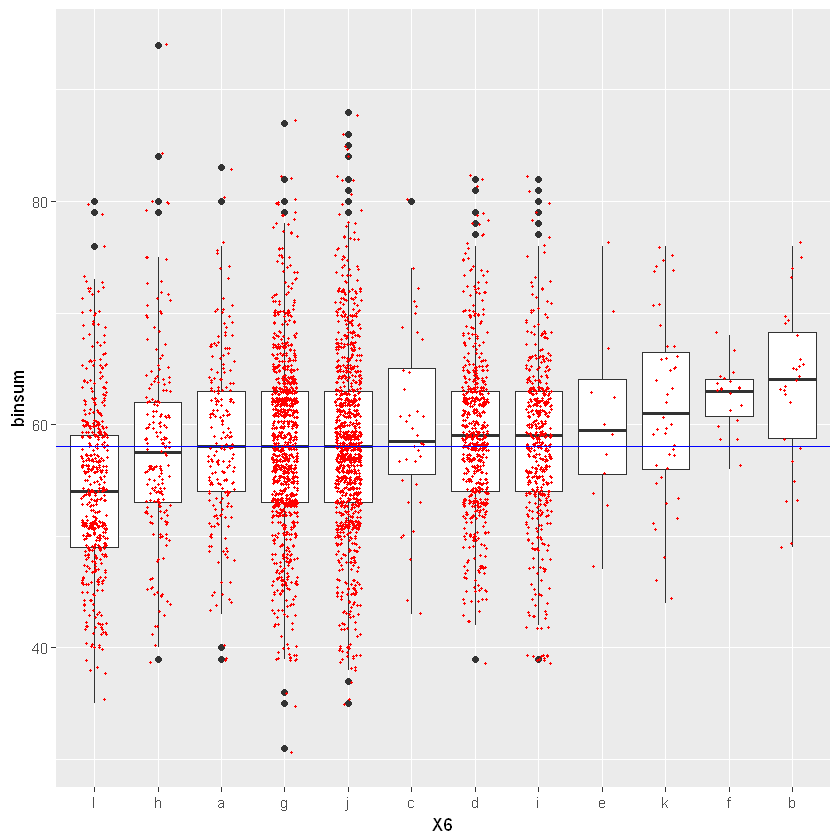

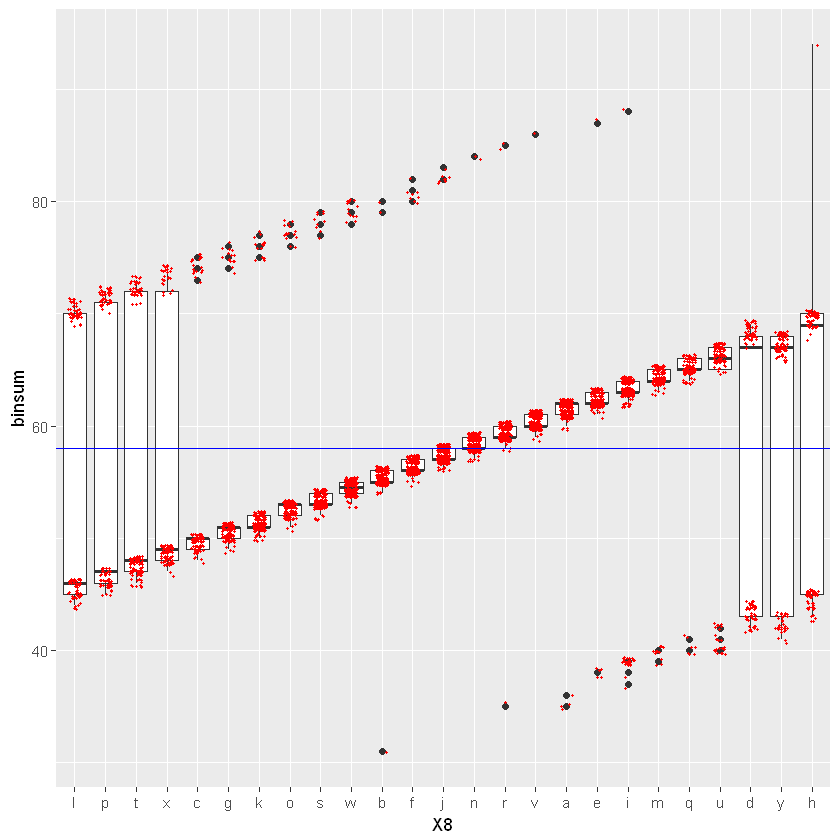

In [46]:
dummy <- train %>%
  select(ID,y,X10:X385)
foo <- tibble(ID = dummy$ID, binsum = rowSums(dummy[-1:-2]), y = dummy$y)

train %>%
  mutate(binsum = foo$binsum) %>%
  ggplot(aes(reorder(X0, binsum, FUN = median) , binsum)) +
  geom_boxplot() +
  geom_jitter(color="red", width = 0.2, size = 0.4) +
  geom_hline(yintercept = 58, colour="blue") +
  labs(x = "X0")

train %>%
  mutate(binsum = foo$binsum) %>%
  ggplot(aes(reorder(X1, binsum, FUN = median) , binsum)) +
  geom_boxplot() +
  geom_jitter(color="red", width = 0.2, size = 0.4) +
  geom_hline(yintercept = 58, colour="blue") +
  labs(x = "X1")

train %>%
  mutate(binsum = foo$binsum) %>%
  ggplot(aes(reorder(X2, binsum, FUN = median) , binsum)) +
  geom_boxplot() +
  geom_jitter(color="red", width = 0.2, size = 0.4) +
  geom_hline(yintercept = 58, colour="blue") +
  labs(x = "X2")

train %>%
  mutate(binsum = foo$binsum) %>%
  ggplot(aes(reorder(X3, binsum, FUN = median) , binsum)) +
  geom_boxplot() +
  geom_jitter(color="red", width = 0.2, size = 0.4) +
  geom_hline(yintercept = 58, colour="blue") +
  labs(x = "X3")

train %>%
  mutate(binsum = foo$binsum) %>%
  ggplot(aes(reorder(X4, binsum, FUN = median) , binsum)) +
  geom_boxplot() +
  geom_jitter(color="red", width = 0.2, size = 0.4) +
  geom_hline(yintercept = 58, colour="blue") +
  labs(x = "X4")

train %>%
  mutate(binsum = foo$binsum) %>%
  ggplot(aes(reorder(X5, binsum, FUN = median) , binsum)) +
  geom_boxplot() +
  geom_jitter(color="red", width = 0.2, size = 0.4) +
  geom_hline(yintercept = 58, colour="blue") +
  labs(x = "X5")

train %>%
  mutate(binsum = foo$binsum) %>%
  ggplot(aes(reorder(X6, binsum, FUN = median) , binsum)) +
  geom_boxplot() +
  geom_jitter(color="red", width = 0.2, size = 0.4) +
  geom_hline(yintercept = 58, colour="blue") +
  labs(x = "X6")

train %>%
  mutate(binsum = foo$binsum) %>%
  ggplot(aes(reorder(X8, binsum, FUN = median) , binsum)) +
  geom_boxplot() +
  geom_jitter(color="red", width = 0.2, size = 0.4) +
  geom_hline(yintercept = 58, colour="blue") +
  labs(x = "X8")

Well, that last one looks ... unusual. Let's first have an overview of what these plots tell us:

- *X0 - X3* and *X8* have the largest amount of variation. The other don't show as much diversity, although *X5-x* has higher *binsum* than the rest of the *X5 levels*.

- A sizeable number of feature levels (e.g. *X0-as* or *X2-p*) are at a notable distance from the global mean binsum level of 58. Some of the numbers will be small, but many of them are decent sized for this distance to be statistically significant.

- Note that the feature levels that have low/high *binsum* are **not** the same feature levels that have low/high *y* in Fig. 5a-h. I could have ordered by *y* instead of *binsum*, yes. But we've already seen in Fig. 7b that there is not much of a trend between *binsum* and *y*. Ordering by *y* confirms this. Feel free to fork and re-order if you want to look at it yourself.

- In essence, there is a clear relation between some categorical *X0 - X8* feature levels having fewer/more binary flags set than others. The way I see it, the statistics looks good enough for that to be more than pure chance. 

Now we have a closer look at one of the curious levels in X8, using a violin plot:

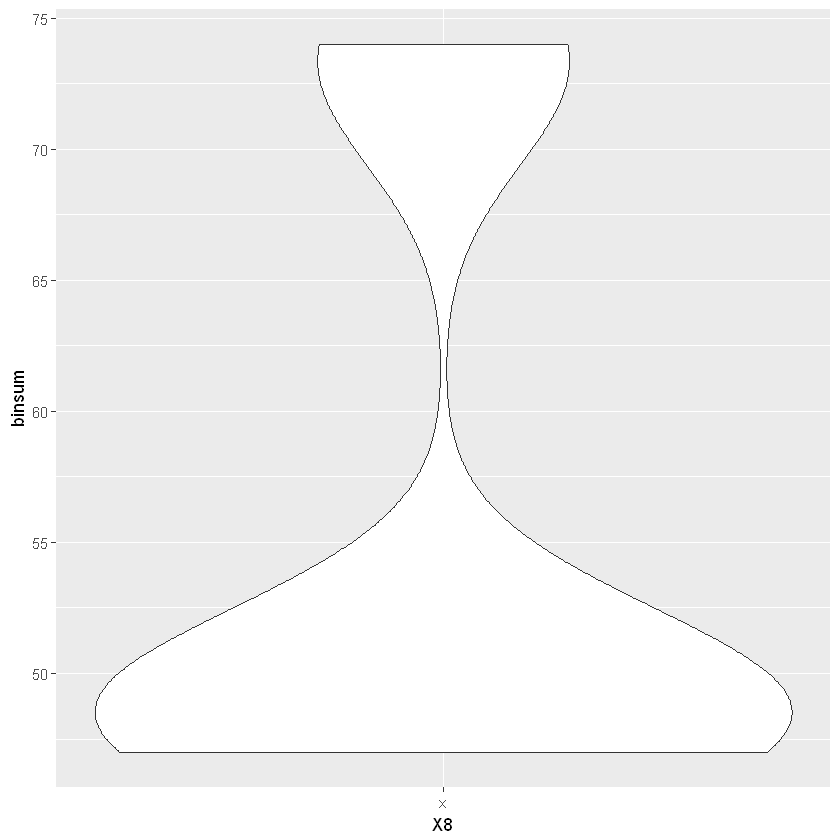

In [47]:
train %>%
  mutate(binsum = foo$binsum) %>%
  filter(X8 == "x") %>%
  ggplot(aes(reorder(X8, binsum, FUN = median) , binsum)) +
  geom_violin() +
  labs(x = "X8")
dummy <- train %>% filter(X8 == "x")


Interesting, in a rather aesthetic kind of way. There are just enough points at high *binsum* not to count as outliers. Together with Fig. 9h we see that there is a strong bimodality in the way that the binary flags related to the *X8* feature levels are distributed. This could be useful.

### PCA

Now we will try a PCA to get an overview on how the various binary features could be connected:

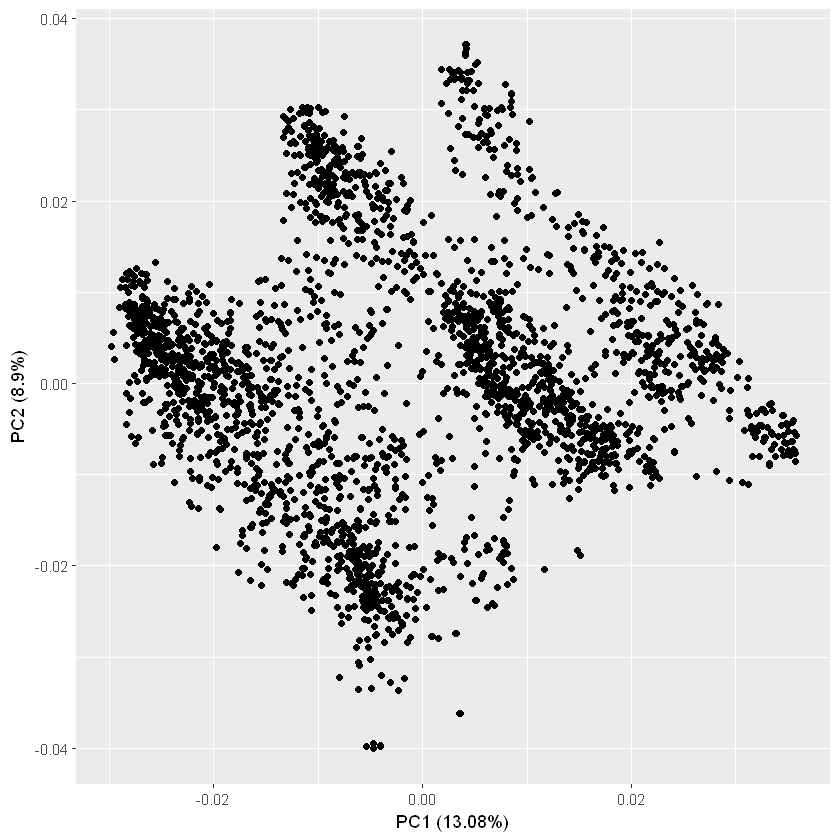

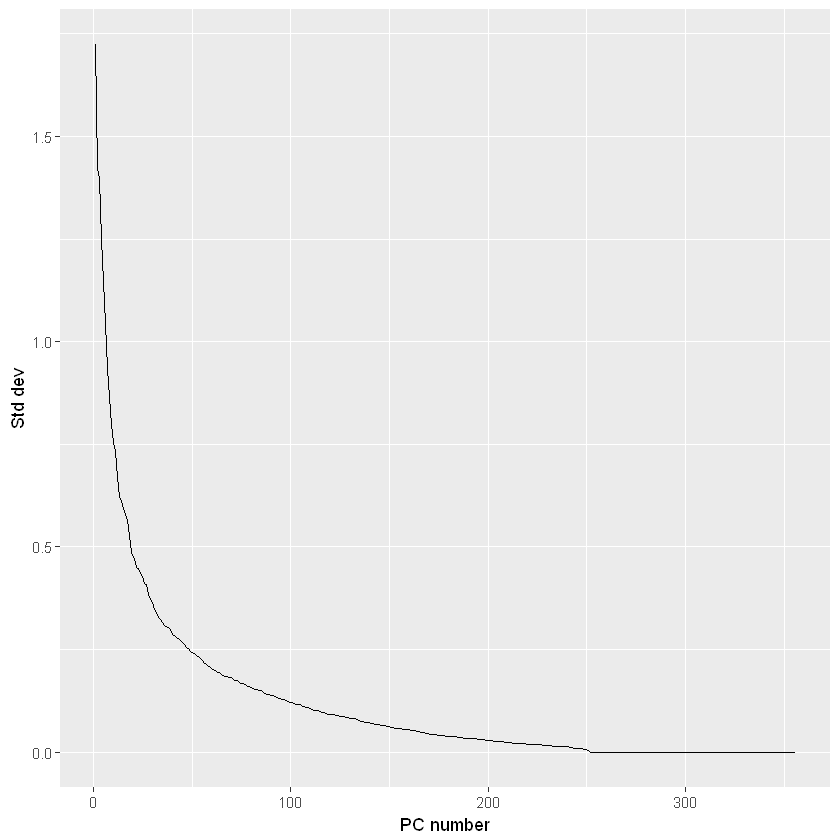

In [48]:
pca <- train %>%
  select(X10:X385) %>%
  mutate_at(vars(starts_with("X")), funs(as.integer)) %>%
  prcomp()
autoplot(pca)

dummy <- tibble(x = seq(1:length(summary(pca)[1]$sdev)), y = summary(pca)[1]$sdev)
ggplot(dummy, aes(x,y)) +
  geom_line() +
  labs(x = "PC number", y = "Std dev")

We see that there is some stratification going on and we could loosely identify three elongated clusters of features. The variance drops relatively quickly, but we would need more than the first few PCs to describe the data set adequately.

### Duplicated feature combinations - intrinsic noise

There have been questions asked in this challenge about the *impact of different testing times* for observations (= rows) with identical features parameters. This is an important constraint, because it limits the prediction accuracy we can expect for any classifier. Mercedes, in their discussion contribution, noted that the "time measurement error is close to zero" but that "different workers drive the cars", and the latter information is not included in the data set (not even in an anonymised way).

Thus, there is a human element to the measuring process that could introduce noticeable variation between test runs with identical settings (*X0 - X385*), which would otherwise be identical. In this section, we explore this effect and try to quantify it.

First, we identify all rows that have duplicates and create a new data frame just for the duplicates:


In [49]:
# only duplicated rows in X0-X385
dup <- train %>%
  select(X0:X385) %>%
  duplicated()
sum(dup)

# only unique rows
unq <- train %>%
  filter(!dup)

# duplicated rows including all copies for X0-X8
dup_x8 <- train %>%
  select(X0:X8)
dup_x8 <- duplicated(dup_x8) | duplicated(dup_x8, fromLast = TRUE)
sum(dup_x8)

# duplicated rows including all copies
dup <- train %>%
  select(X0:X385)
dup <- duplicated(dup) | duplicated(dup, fromLast = TRUE)
sum(dup)
nrow(train)

# those are the observations that share the same
# X0-X8 but different X10-X385
dup_x8_no_x10 <- train %>%
  filter(dup != dup_x8)
nrow(dup_x8_no_x10)

# data frame of dup rows incl all copies
dup <- train %>%
  filter(dup)

[1] 298

[1] 591

[1] 515

[1] 4208

[1] 76

Almost 300 rows out of 4200 are duplicates. That's 7\%. In total, there are 515 rows (or 12\%) of the training set that contain repeated configurations (including the unique sequences among the duplicates). 

Another interesting observation is that there are 76 rows that contain duplicates in *X0 - X8* which differ in one or more *X10 - X385* entries. For instance: row IDs 61 and 81 share the same *X0 - X8* entries (aj, l, as, f, d, j, g, j) but differ in features *X142* (0 vs 1) and *X158* (1 vs 0). Granted, those are just two bits that are set differently but it still appears to be inconsistent with the interpretation suggested by [PC Jimmmy in a recent discussion item](https://www.kaggle.com/c/mercedes-benz-greener-manufacturing/discussion/34530).

*This clever and very efficient way of grouping and summarising the duplicate row statistics was contributed by [Marcel Spitzer](https://www.kaggle.com/msp48731) in the comments. Many thanks! Check out his excellent [visualisation kernel](https://www.kaggle.com/msp48731/feature-engineering-and-visualization)!*


In [50]:
dup_sum <- dup %>% 
  group_by_(.dots=colnames(dup)[3:ncol(dup)]) %>%
  summarise(ymean=mean(y),
            ysd=sd(y),
            ymin=min(y),
            ymax=max(y),
            ygr=n(),
            IDs=list(ID))


Next are a couple of summary plots, which will be discussed below. I show the following: (a) a histogram of the standard deviations within the groups of duplicates, (b) a histogram of the group sizes, (c) a scatter plot of the *y standard deviations* in percent of *mean y* plotted over *mean y*, (d) a comparison of the empirical cumulative density functions (ecdf) for all *y* training data values versus the *mean y* of the duplicate rows: 


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


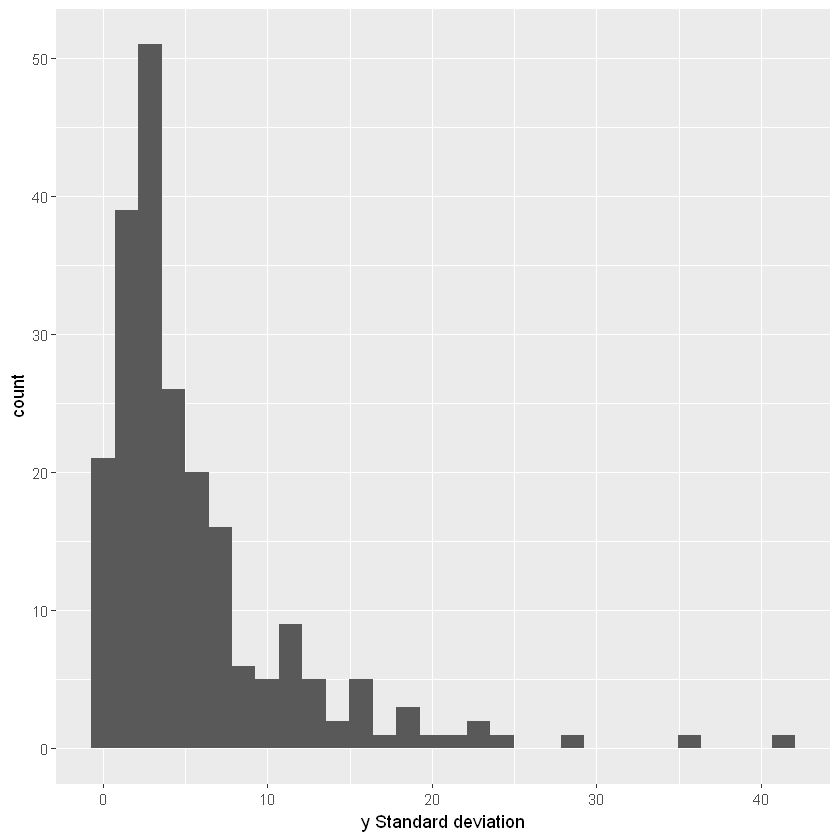

Warning message in mutate_impl(.data, dots):
"Unequal factor levels: coercing to character"Warning message in mutate_impl(.data, dots):
"binding character and factor vector, coercing into character vector"Warning message in mutate_impl(.data, dots):
"binding character and factor vector, coercing into character vector"Warning message in mutate_impl(.data, dots):
"binding character and factor vector, coercing into character vector"Warning message in mutate_impl(.data, dots):
"binding character and factor vector, coercing into character vector"Warning message in mutate_impl(.data, dots):
"binding character and factor vector, coercing into character vector"Warning message in mutate_impl(.data, dots):
"binding character and factor vector, coercing into character vector"Warning message in mutate_impl(.data, dots):
"binding character and factor vector, coercing into character vector"Warning message in mutate_impl(.data, dots):
"binding character and factor vector, coercing into character vect

"binding character and factor vector, coercing into character vector"Warning message in mutate_impl(.data, dots):
"binding character and factor vector, coercing into character vector"Warning message in mutate_impl(.data, dots):
"binding character and factor vector, coercing into character vector"Warning message in mutate_impl(.data, dots):
"binding character and factor vector, coercing into character vector"Warning message in mutate_impl(.data, dots):
"binding character and factor vector, coercing into character vector"Warning message in mutate_impl(.data, dots):
"binding character and factor vector, coercing into character vector"Warning message in mutate_impl(.data, dots):
"binding character and factor vector, coercing into character vector"Warning message in mutate_impl(.data, dots):
"binding character and factor vector, coercing into character vector"Warning message in mutate_impl(.data, dots):
"binding character and factor vector, coercing into character vector"Warning message in 

"binding character and factor vector, coercing into character vector"Warning message in mutate_impl(.data, dots):
"binding character and factor vector, coercing into character vector"Warning message in mutate_impl(.data, dots):
"binding character and factor vector, coercing into character vector"Warning message in mutate_impl(.data, dots):
"binding character and factor vector, coercing into character vector"Warning message in mutate_impl(.data, dots):
"binding character and factor vector, coercing into character vector"Warning message in mutate_impl(.data, dots):
"binding character and factor vector, coercing into character vector"Warning message in mutate_impl(.data, dots):
"binding character and factor vector, coercing into character vector"Warning message in mutate_impl(.data, dots):
"binding character and factor vector, coercing into character vector"Warning message in mutate_impl(.data, dots):
"binding character and factor vector, coercing into character vector"Warning message in 

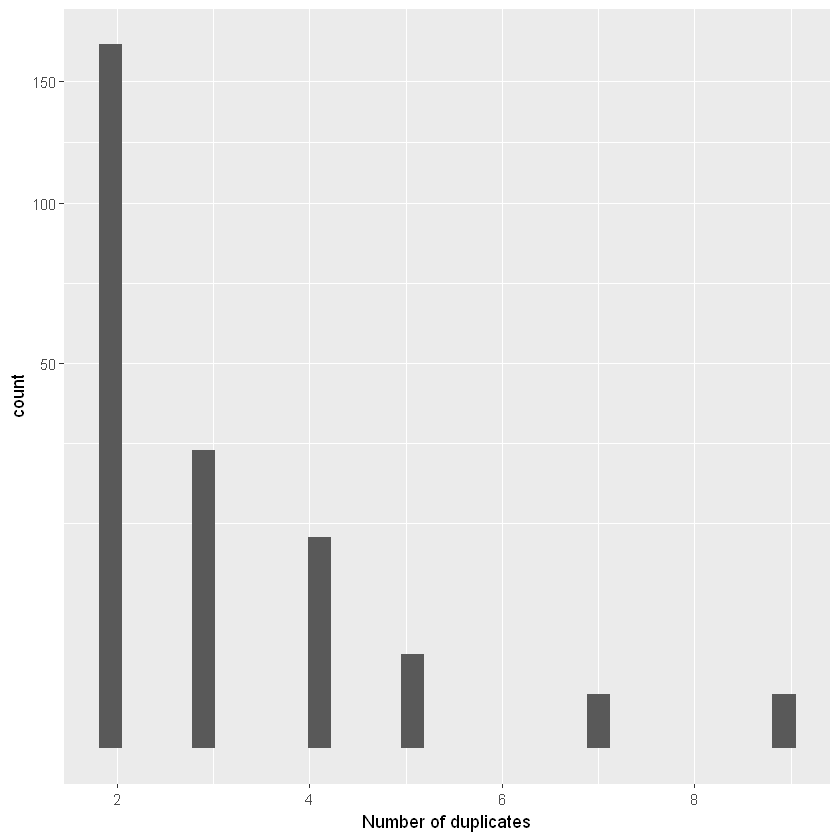

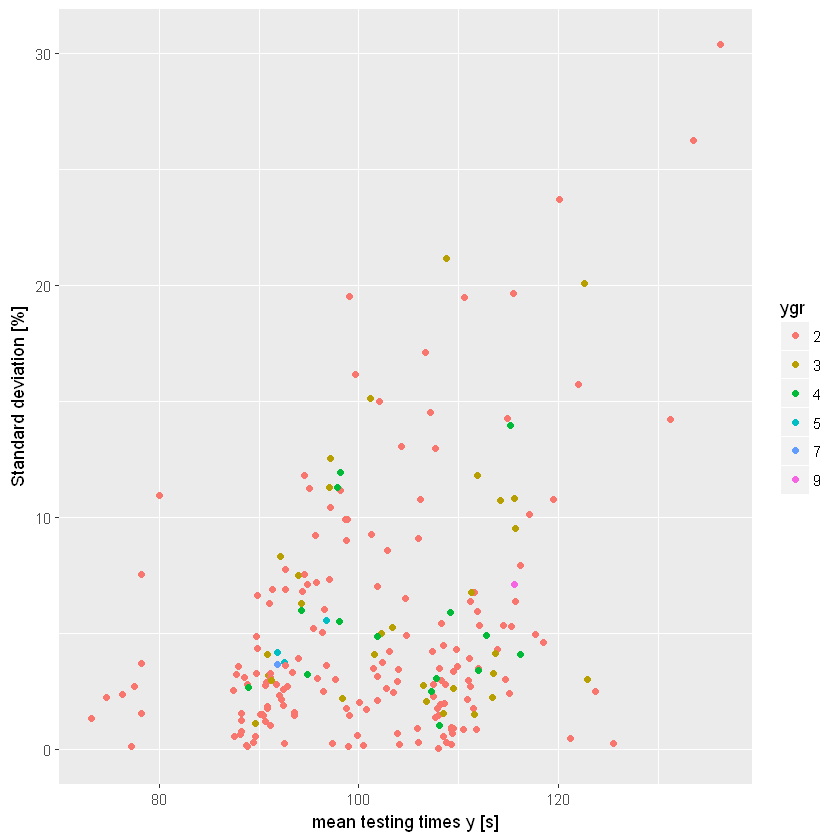

[1] "The median standard deviation is 3.50"


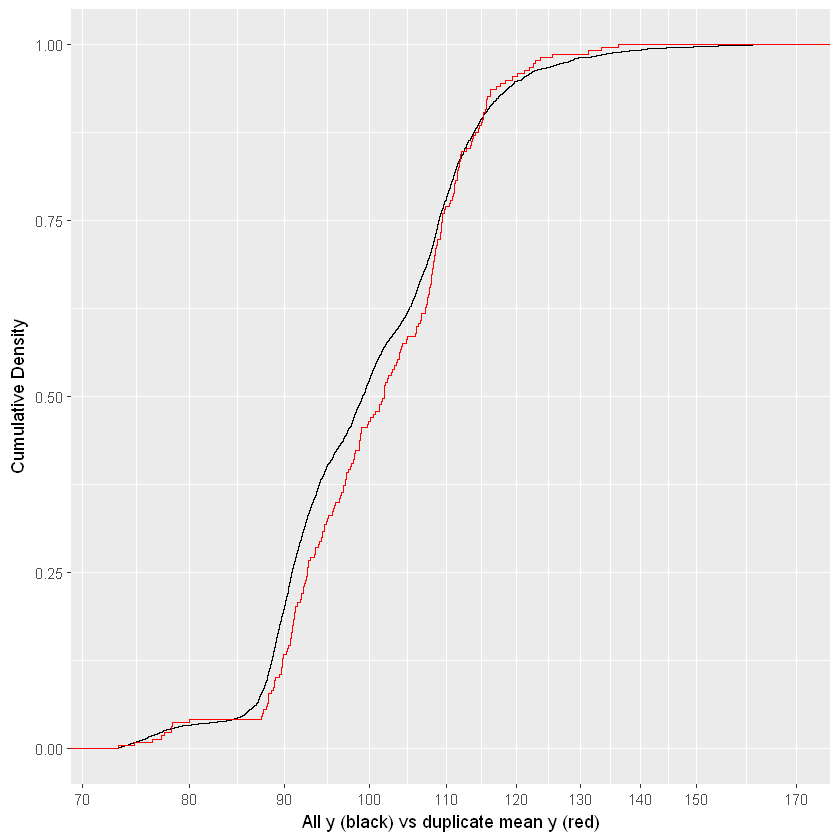

In [51]:
ggplot(dup_sum, aes(ysd)) + geom_histogram() + labs(x = "y Standard deviation")
ggplot(dup_sum, aes(ygr)) + geom_histogram() + scale_y_sqrt() +
  labs(x = "Number of duplicates")

dup_sum %>%
  mutate(ygr = as.factor(ygr)) %>%
  ggplot(aes(ymean,ysd/ymean*100, color=ygr)) +
  geom_point() +
  labs(x = "mean testing times y [s]", y = "Standard deviation [%]")

train %>%
  ggplot(aes(y)) +
  stat_ecdf(geom = "step") +
  stat_ecdf(aes(ymean), data = dup_sum, geom = "step", color = "red") +
  scale_x_log10(breaks=c(seq(70,150,10),seq(170,270,20))) +
  labs(x = "All y (black) vs duplicate mean y (red)", y = "Cumulative Density")
  
print(str_c("The median standard deviation is ", sprintf("%.2f",median(dup_sum$ysd))))

We learn:

- There are few cases of more than 4 duplicated rows, but they exist (see bar plot).

- The median standard variation is relatively low, at 3.5 s, but there are multiple cases with a standard deviation larger than 10 s and up to a maximum of 30 s (see histogram and scatter plot). Most of these cases only have 2 or 3 duplicates (including the "original"; see scatter plot). Nevertheless, the presence of such large deviations *within* identical combinations will restrict the achievable prediction accuracy.

- The trend of increasing variation with increasing mean testing will complicate the estimate of the maximum expected accuracy. To a certain extend, you would expect that groups with higher variation also have a higher mean, since the variation happens predominantly toward higher values. However, I'm not sure whether this explains 100\% of the observed effect. Comments are welcome, as usual.

- The distribution of the *mean y* for the duplicated cases follows the overall *y* distribution in the training data very closely (see ecdf plot). If we do a 2-sample Wilcoxon test on these empirical cumulative density functions (ecdf), then we find:

In [52]:
utest <- wilcox.test(train$y, dup_sum$ymean, alternative = "less")
print(utest)


	Wilcoxon rank sum test with continuity correction

data:  train$y and dup_sum$ymean
W = 417880, p-value = 0.01752
alternative hypothesis: true location shift is less than 0



- This shows that the *mean duplicated y* (red) are higher than the overall *y* on the 95\% confidence level. However, the significance of this shift doesn't exceed the 99\% confidence level. Feel free to discuss whether this tentative difference has a meaningful impact on the predictions.

*The next part* relates to the median standard variation of the duplicates. It starts with code that was copied (with permission) from [another great kernel](https://www.kaggle.com/msp48731/biased-predictions-how-to-deal-with-them) by [Marcel Spitzer](https://www.kaggle.com/msp48731) and I will use it to pose a provocative question. Don't forget to check out Marcel's kernel; there are additional interesting insights in his work.

In Fig. 4 we found that the distribution of the *y* target variable is clearly multi-modal with four obvious peaks. Here we define a Gaussian cluster model to fit to this distribution. Our model has 5 clusters to take into account the extended tail of values with *y > 120*: 


In [54]:
# perform model based clustering with n_clusters random variables 
n_clusters <- 5
fit <- Mclust(train$y, G=n_clusters)
summary(fit)

----------------------------------------------------
Gaussian finite mixture model fitted by EM algorithm 
----------------------------------------------------

Mclust V (univariate, unequal variance) model with 5 components:

 log.likelihood    n df       BIC       ICL
      -15914.06 4208 14 -31944.94 -33383.18

Clustering table:
   1    2    3    4    5 
 154 1536  718 1531  269 

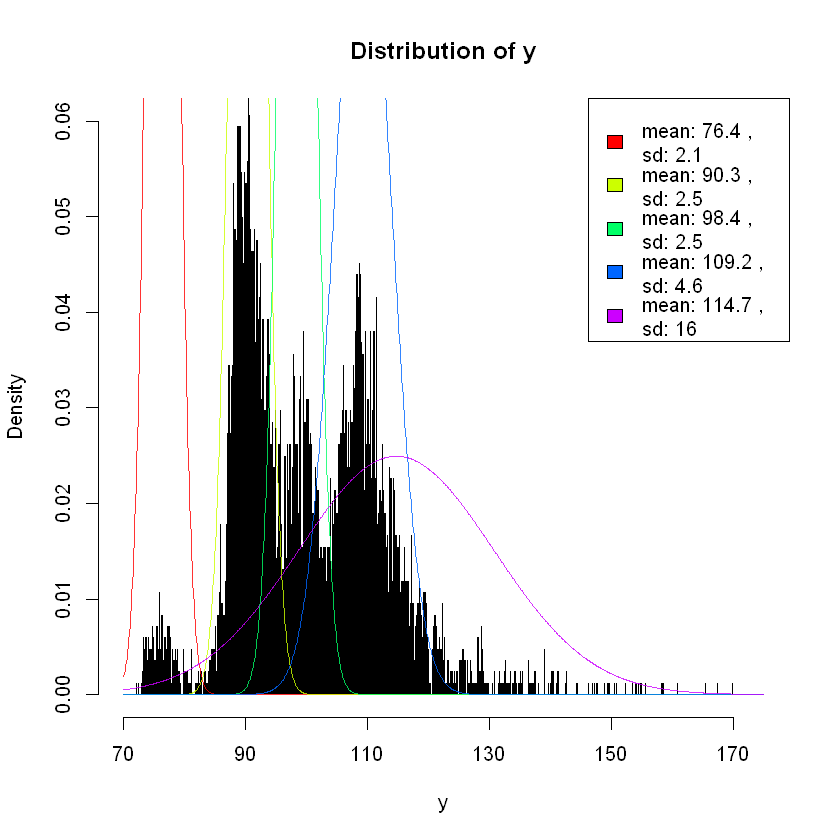

In [56]:
# plot histogram with separate densities 
hist(train$y, breaks=length(train$y)/10, border=NA, col="black", probability = T, 
     ylim=c(0,0.06), main="Distribution of y", xlab="y", xaxt="n", xlim=c(70,175))
axis(1, at = seq(70,175,by=20))
xval <- seq(70,175,by=0.1)
yval <- sapply(1:n_clusters, function(i) { dnorm(xval, mean=fit$parameters$mean[i], 
                                                 sd=sqrt(fit$parameters$variance$sigmasq[i])) })
matplot(xval, yval, type="l", add = T, lty = 1, col = alpha(rainbow(n_clusters), 0.8))
legend("topright", legend = c(paste("mean:", round(fit$parameters$mean, digits = 1), ", 
sd:", round(sqrt(fit$parameters$variance$sigmasq), digits = 1))), fill = rainbow(n_clusters))

- We find that the model identifies the four main clusters nicely. The fifth one (purple) is an ok solution for now, but I think that a Gaussian is probably not the right choice here since it stretches too much into lower y values (especially into the 4th (blue) cluster).

- Currently, I have the impression that the *y > 130* values are mostly (rare) outliers of some sorts. Maybe an exponential distribution would be well-suited to describe this long tail, but I'm not sure whether we have sufficient information to predict specific instances of *y > 130*. In this kernel (so far) we find no feature that consistently characterises values of even *y > 120*. A question is: **Which features, existing or engineered, do predict high values of y?**

- **More importantly:** *Notice how the fitted standard deviations of the four narrow Gaussian (2.1 - 4.6) are in the same ballpark as the median standard deviation (3.5) we just found in our duplicates.* This suggests that the width of the peaks could be *random* variation (based on the data we have) and therefore be unpredictable. In that case, the best we could do is to identify which class a certain observation belongs to and everything beyond that would already be overfitting (including the high-*y* tail). This interpretation could still be missing crucial ingredients, but I think it's fair to say that the intrinsic noise is a serious problem here. My question is therefore: **Can we do better than simply identifying the Class of a certain ID without overfitting?**

*Next*, we predict the cluster associations for each *ID* plus the probabilities that this assignment is based on. The highest probability of course decides which *Class*, with respect the above figure, gets assigned to each *ID*:

In [57]:
preds <- predict(fit, train$y)
probs <- data.frame(preds$z); colnames(probs) <- paste0("Pr", 1:n_clusters)
classes <- apply(probs, 1, which.max)

em_clusters <- data.frame(ID=train$ID, probs, Class=classes)
head(em_clusters)

ID,Pr1,Pr2,Pr3,Pr4,Pr5,Class
0,1.416275e-146,9.781824e-58,4.147634e-35,2.468007e-04,0.99975320,5
6,7.263205e-09,9.793341e-01,2.967171e-04,2.863805e-05,0.02034059,2
7,9.718678e-01,7.293001e-07,1.201655e-16,3.690363e-11,0.02813145,1
9,6.886058e-01,2.023253e-02,4.794829e-10,1.114276e-07,0.29116154,1
13,9.512055e-01,4.414288e-05,5.293539e-14,6.976278e-10,0.04875037,1
18,5.073393e-15,8.941601e-01,6.672446e-02,1.587160e-03,0.03752832,2


Now we extend Marcel's treatment by going back to Fig. 6 and colouring the combinations of *X0* vs the other categorical features according to the *Class* identification. (I left out *X4* because it consists pretty much of just a single feature level.)

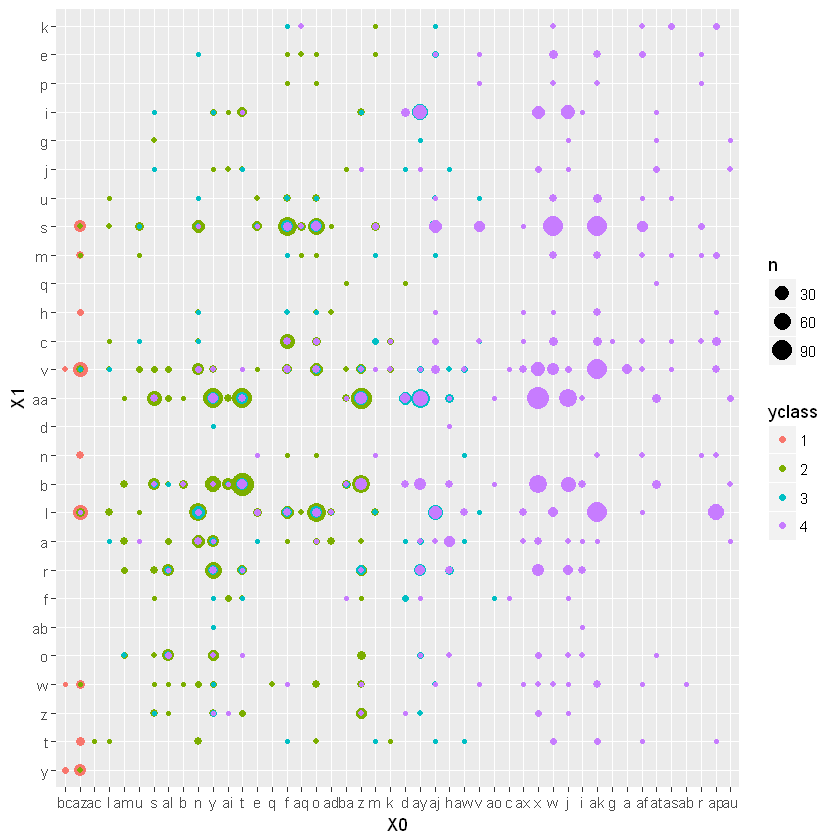

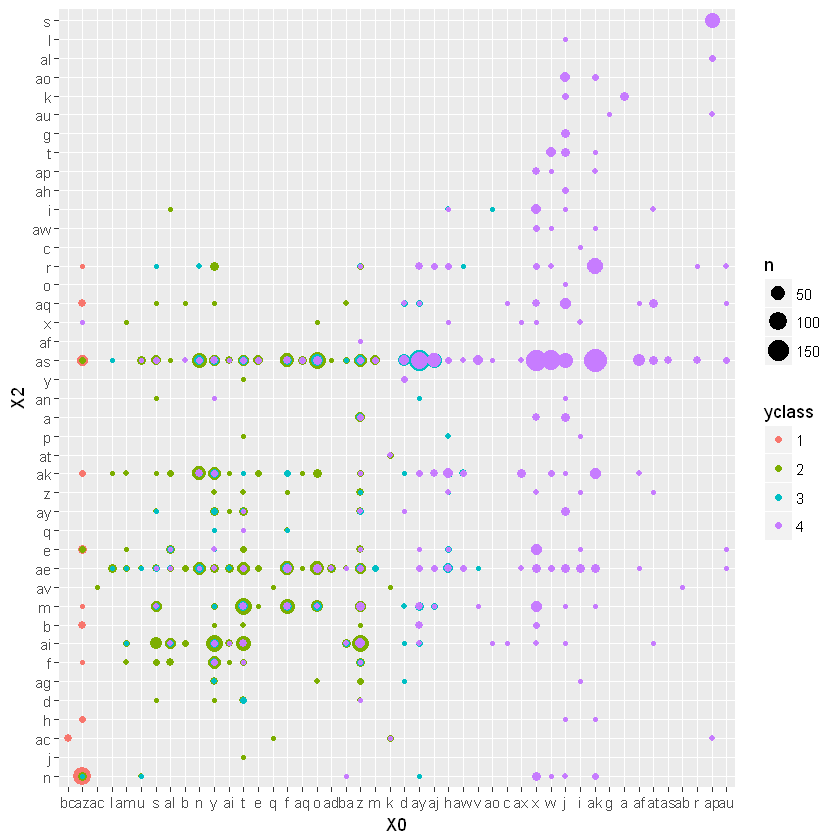

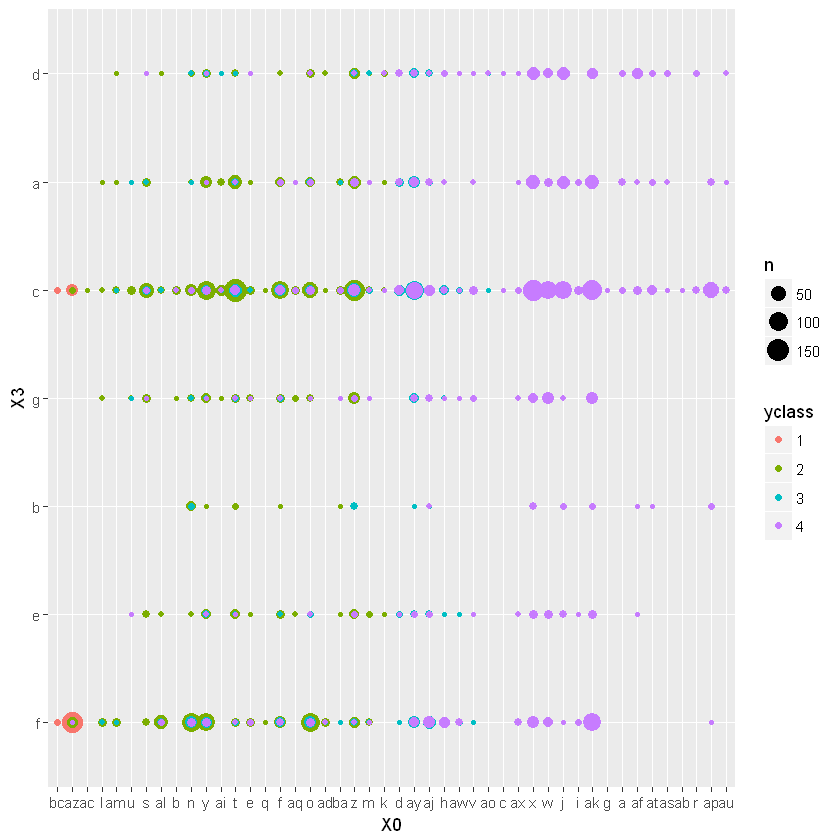

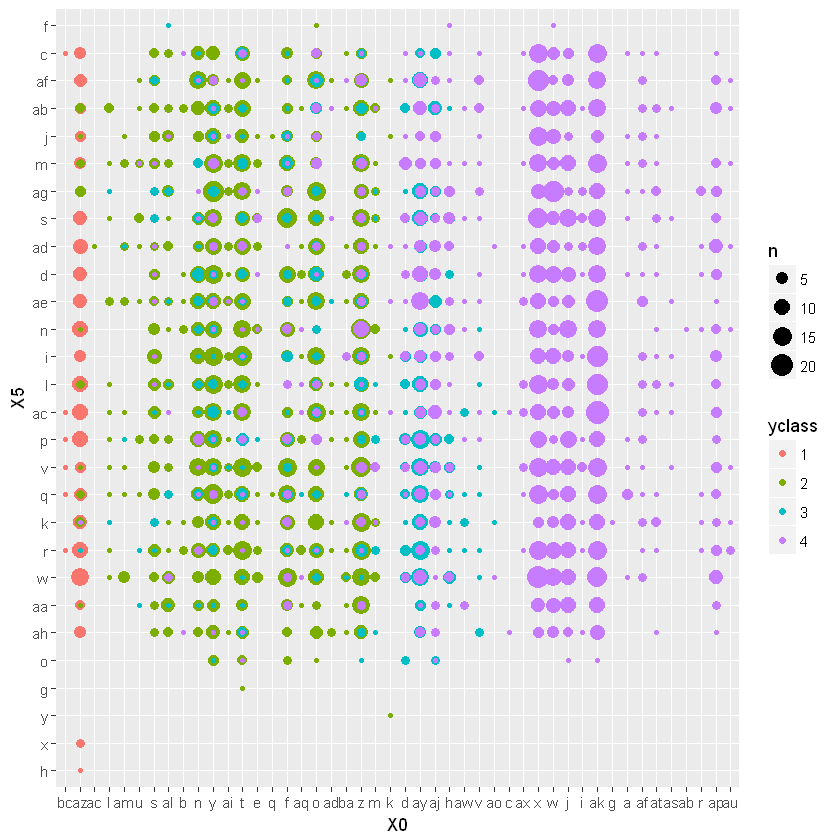

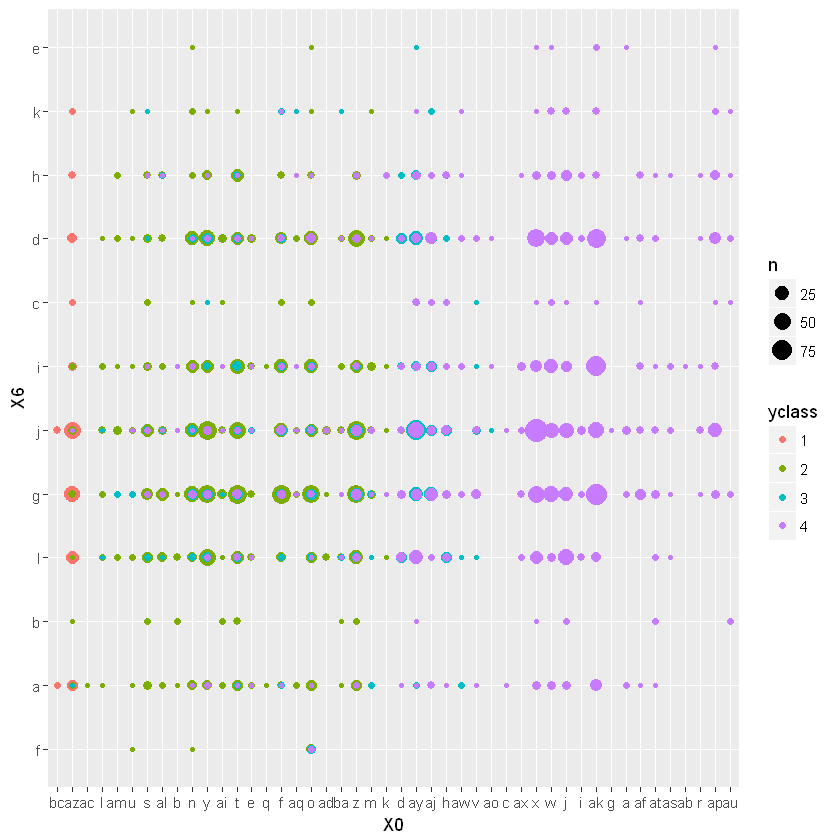

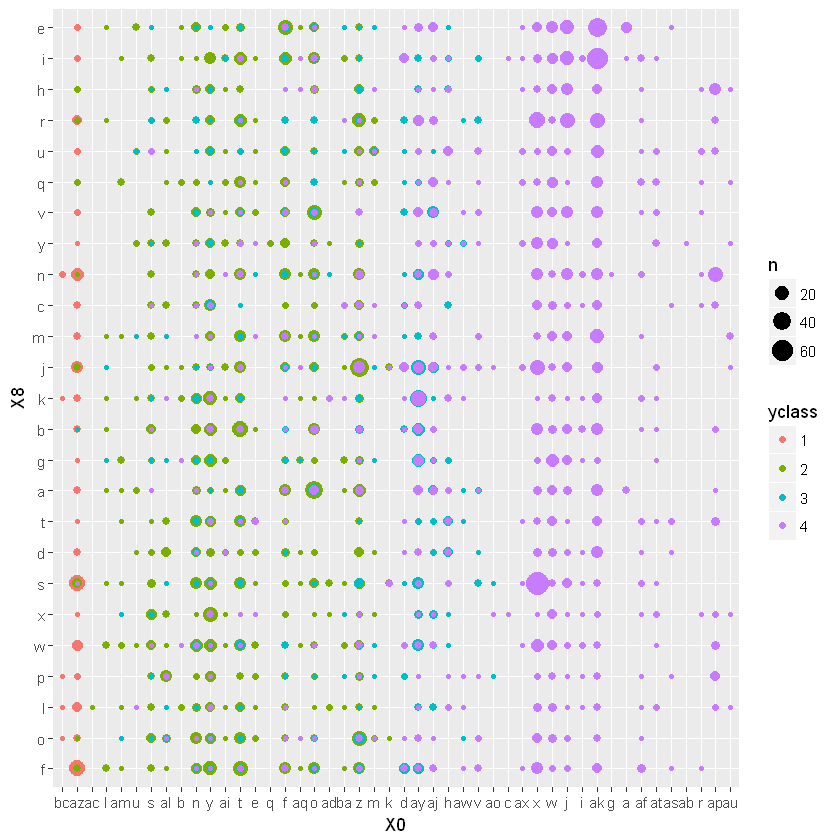

In [58]:
train %>% 
  mutate(yclass = as.factor(em_clusters$Class)) %>% 
  select(y,yclass,X0,X1) %>%
  filter(yclass != 5) %>%
  ggplot(aes(reorder(X0, y, funs = median), reorder(X1, y, funs = median), color = yclass)) +
  #ggplot() +
  geom_count() +
  labs(x = "X0", y = "X1")

train %>% 
  mutate(yclass = as.factor(em_clusters$Class)) %>% 
  select(y,yclass,X0,X2) %>%
  filter(yclass != 5) %>%
  ggplot(aes(reorder(X0, y, funs = median), reorder(X2, y, funs = median), color = yclass)) +
  #ggplot() +
  geom_count() +
  labs(x = "X0", y = "X2")

train %>% 
  mutate(yclass = as.factor(em_clusters$Class)) %>% 
  select(y,yclass,X0,X3) %>%
  filter(yclass != 5) %>%
  ggplot(aes(reorder(X0, y, funs = median), reorder(X3, y, funs = median), color = yclass)) +
  #ggplot() +
  geom_count() +
  labs(x = "X0", y = "X3")

train %>% 
  mutate(yclass = as.factor(em_clusters$Class)) %>% 
  select(y,yclass,X0,X5) %>%
  filter(yclass != 5) %>%
  ggplot(aes(reorder(X0, y, funs = median), reorder(X5, y, funs = median), color = yclass)) +
  #ggplot() +
  geom_count() +
  labs(x = "X0", y = "X5")

train %>% 
  mutate(yclass = as.factor(em_clusters$Class)) %>% 
  select(y,yclass,X0,X6) %>%
  filter(yclass != 5) %>%
  ggplot(aes(reorder(X0, y, funs = median), reorder(X6, y, funs = median), color = yclass)) +
  #ggplot() +
  geom_count() +
  labs(x = "X0", y = "X6")

train %>% 
  mutate(yclass = as.factor(em_clusters$Class)) %>% 
  select(y,yclass,X0,X8) %>%
  filter(yclass != 5) %>%
  ggplot(aes(reorder(X0, y, funs = median), reorder(X8, y, funs = median), color = yclass)) +
  #ggplot() +
  geom_count() +
  labs(x = "X0", y = "X8")

These plots have the same setup as Fig. 6, with the factor levels of *X0 - X8* being re-ordered by increasing median *y*. I have removed the 5th *Class*, defined by the broad Gaussian, because it obfuscates the points I'm trying to make here:

- The distinction between the different *Class* associations is relatively clear, although there remain overlaps between the classes. In particular *Class 3* (cyan) is rather scattered.

- Most of the signal is contained in *X0*, as several other kernels have already successfully shown. There appear to be no strong trends based on the other categorical features.

## Derived features

We define the following new features based on our initial exploration:

- *diff*: a measure of how different the binary features (*X10+*) are for each observation (i.e. row) in the training data

- *yclass:* the grouping of *y* histogram peaks as estimated from the Gaussian cluster model above..

### Similarity/difference measure: *diff*

Here, we are trying to get an idea of how the *difference* of certain binary flag combinations affects the testing time *y*. As a first approach, we define *diff* as the sum of the absolute deviations in each binary feature row:

Our reference row will be the one with the smallest *y*. We then transform earch row into a vector (for *X10 - X385* only) and subtract that vector from the reference row which we have transformed in the same way. This gives us a vector with elements in [-1, 0, 1] and we take the absolute value of it, resulting in elements in [0, 1]. Based on this vector, we define our *diff* as the sum of all elements. This means that two rows are less similar (have higher *diff*) if more flags are set differently. This is a different measure from the simple number of flags set (i.e *binsum*) that we just compute above, because two rows (i.e. testings) could have the same number of flags set but for different binary features.

The reference row is an arbitrary choice that doesn't affect the results, because the difference of random rows is the same as the difference of their differences from the reference row. So, it doesn't make a difference ;-)

*(Note that this is a rather clumsy hack of someone who is just slowly thinking their way through a new problem. If you know ways to code this in a more efficient/dplyr way, or if you know how to implement established "similarity measures" then I would be very happy to learn from you.)*

In [60]:
minrow <- train %>%
  filter(near(y, min(y))) %>%
  select(X10:X385) %>%
  unlist(use.names = FALSE)

# dummy variable setting
train <- train %>%
  mutate(diff = -99)

for (i in seq(1:length(train$y))){
  row <- train[i,] %>%
    select(X10:X385) %>%
    unlist(use.names = FALSE)
  train$diff[i] = sum(abs(minrow - row))}


After computing it, we now plot *diff* vs *y*:

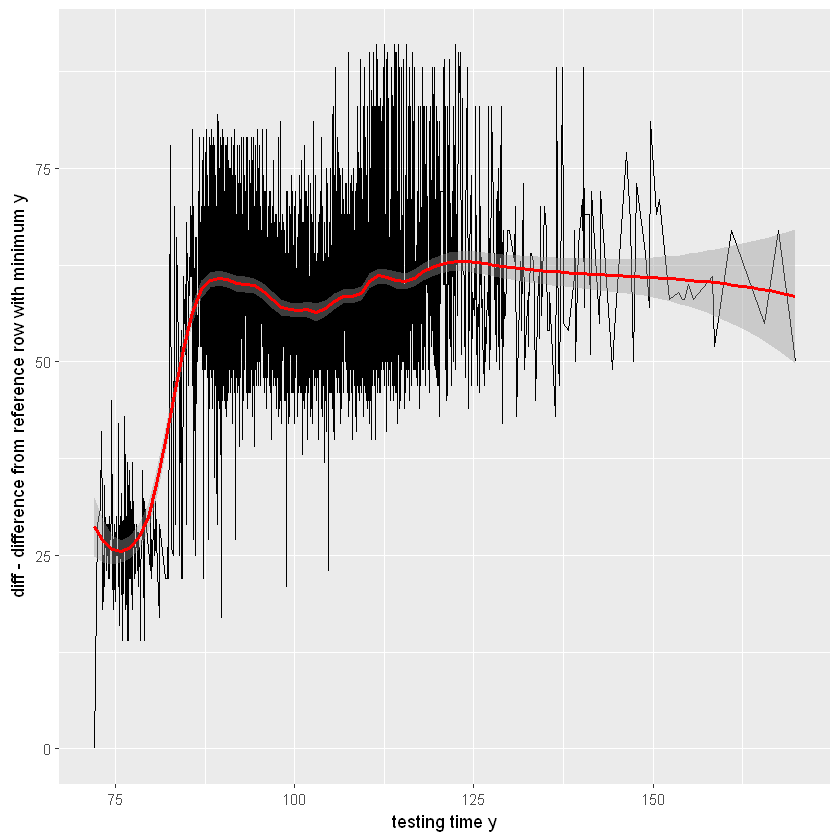

In [62]:
ggplot(train, aes(y,diff)) +
  geom_line() +
  geom_smooth(method = "loess", span = 1/5, colour = "red") +
  labs(x = "testing time y", y = "diff - difference from reference row with minimum y")

We find that the shortest *y* are clearly grouped together in a cluster of binary flags with a smaller difference than the rest of the sample. Again, there is a bit of a substructure in the bulk between *y = 90 - 120* but it's nowhere near as pronounced as the big step. Towards the highest *y* the similarity of binary features seems to make no significant impact.

### Grouping by testing time clusters: *yclass*

We define the *yclass* identifications based on the multi-Gaussian cluster fit in the duplicated rows section. This will be an assisting feature, since we need knowledge about the target variable to define it. Nothing we can train on, but it could be useful for exploration.

In [63]:
train <- train %>%
  mutate(yclass = as.factor(em_clusters$Class))

Let's try and see how these cluster classes look in our PCA attempt:

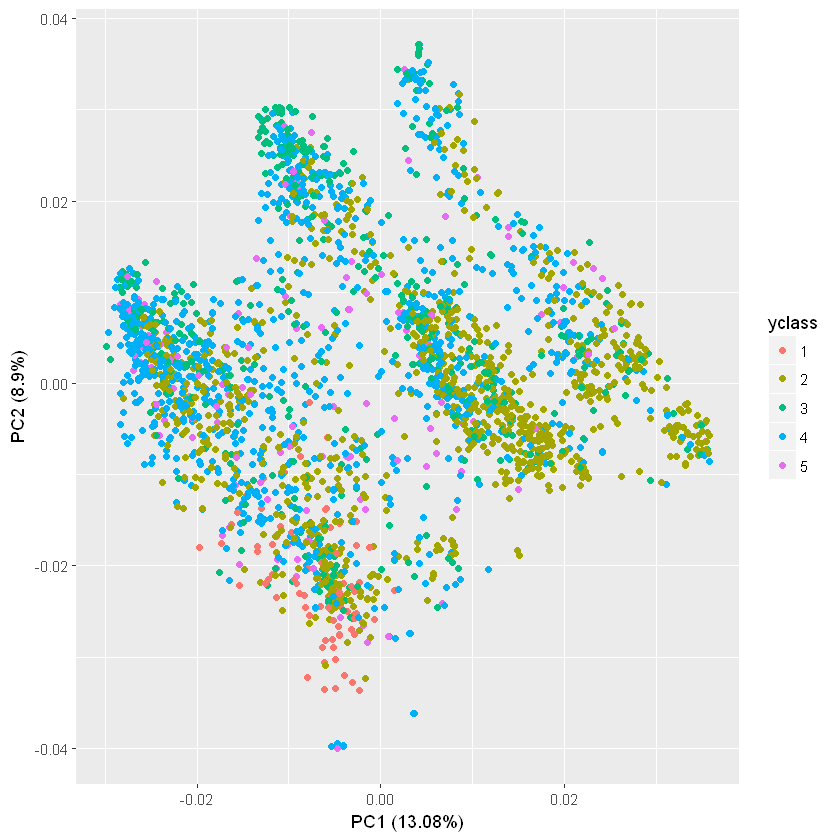

In [64]:
train %>%
  select(X10:X385) %>%
  mutate_at(vars(starts_with("X")), funs(as.integer)) %>%
  prcomp() %>%
  autoplot(data = train, colour = 'yclass')

- Overall quite a bit of scatter, although the group for the shortest *y* times (*Class == 1*) seems to be relatively confined in one region of the plot. Given what we've seen in the *diff* plot above, the PCA seems to be able to capture the similarity between different binary flags on an additional level.

- The green and blue classes are somewhat separated but still show significant overlap within the PCA clusters that we can identify by eye. 